# <font color = blue> Credit EDA Case Study </font>

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

- [Reading The Data](#Read)
- [Quality Checks](#Quality)
- [Check for Missing values](#Missing)
- [Imputing the missing Data](#IM)
- [Treating Wrong Data and Wrong Data Types](#Treat)
- [Outlier Detection](#Outlier)
- [Binning of Continous Data](#Bin)
- [Analysis of the Data](#Analysis)
  - [Univariate Analysis](#Uni)
  - [Bivariate Analysis](#Bi)
- [Reading The Data (Previous Application)](#Read2)
- [Analysis of the Data](#Analysis2)
  - [Univariate Analysis](#Uni2)
  - [Bivariate Analysis](#Bi2)

<a id="Read"></a>
## Task 1: Reading the Data


>- ### Subtask 1.1: Read the Application Data.

In [5]:
# Reading the application data using read_csv function
application= pd.read_csv("application_data.csv")

In [6]:
#Taking a peak at the data
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

>- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [7]:
# Getting the dimensions of the data
application.shape

(307511, 122)

In [8]:
#Checking the nnull values and data types of the columns of the application file.
application.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [9]:
#Using describe() on application file.
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

<a id="Quaity"></a>
## Task 2: Data Quality Checks 

<a id="Missing"></a>

>- ###  Subtask 2.1: Check for missing values

In [10]:
# To count the percentage of missing values in each column and sorting them in descending order.
application.isna().sum().sort_values(ascending=False)*100/len(application)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

**One can clearly see that there are so many columns with Null values more than 50% in it.**

**In order to deal with these columns, we opt to delete them/ not work with them. Hence we decide to drop columns which have null values more than 47%**

In [11]:
# Dropping the columns which have nul values more than 47%
for column in application.columns:
    if application[column].isna().sum()*100/len(application) >47 :
        application.drop(column,axis=1,inplace=True)

<a id="IM"></a>
>- ###  Subtask 2.2: Imputing the missing the data

In [12]:
# Checking for null values again.
application.isna().sum().sort_values(ascending=False)*100/len(application)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
NAME_INCOME_TYPE                0.000000
FLAG_OWN_REALTY                 0.000000
TARGET                          0.000000
FLAG_EMAIL                      0.000000
FLAG_PHONE                      0.000000
FLAG_CONT_MOBILE                0.000000
NAME_CONTRACT_TY

**We can see that there are still few columns which have null values. We'll deal it by imputing data, as by dropping these columns we might end up losing the data or information.**

**Let's find out how and which columns we can impute.**

In [13]:
# Finding columns with less than 13% and more than 0% null values.
for column in application.columns:
    if application[column].isna().sum()*100/len(application) < 15 and  application[column].isna().sum()*100/len(application) > 0:
        print(column)

AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
CNT_FAM_MEMBERS
EXT_SOURCE_2
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR


**Handling "AMT_ANNUITY" Column**

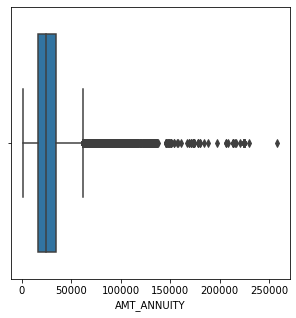

In [14]:
# Applying box plot to see the variation in the data
plt.figure(figsize=[5,5])
sns.boxplot(application['AMT_ANNUITY'])
plt.show()

In [15]:
# Using describe() on "AMT_ANNUITY" to get it's quantiles and mean.
application['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

`Conclusion`:We can replace the missing values in this data with median.

**Handling "NAME_TYPE_SUITE" Column**

In [16]:
# Appying value counts to identify fequency of the values in the column.
application['NAME_TYPE_SUITE'].value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

`Concluson`We can replace the missing value in "NAME_TYPE_SUITE" with "Unaccompanied" as it is the mode with 81% of the column filled with it.

**Handling "CNT_FAM_MEMBERS" Column**

In [17]:
# Appying value counts to identify fequency of the values in the column.
application['CNT_FAM_MEMBERS'].value_counts(normalize=True)

2.0     0.514967
1.0     0.220634
3.0     0.171055
4.0     0.080313
5.0     0.011310
6.0     0.001327
7.0     0.000263
8.0     0.000065
9.0     0.000020
10.0    0.000010
14.0    0.000007
16.0    0.000007
12.0    0.000007
20.0    0.000007
11.0    0.000003
13.0    0.000003
15.0    0.000003
Name: CNT_FAM_MEMBERS, dtype: float64

In [18]:
# Applyinng describe() to see the mean and median of the data.
application['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

`Conclusion`:The null values of this column can be filled by 2 as it is the median, approx mean as well as 50% of data in this from a family of 2.

**Handling "AMT_REQ_CREDIT_BUREAU" different columns**

In [19]:
# Applying value counts to get friquencies of calues of 'AMT_REQ_CREDIT_BUREAU_HOUR'
application['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True)

0.0    0.993887
1.0    0.005865
2.0    0.000211
3.0    0.000034
4.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

`Conclusion`:0 has the highest number of entries with 99% of the data.

In [20]:
# Applying value counts to get friquencies of calues of 'AMT_REQ_CREDIT_BUREAU_Day'.
application['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True).head()

0.0    0.994402
1.0    0.004857
2.0    0.000399
3.0    0.000169
4.0    0.000098
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

`Conclusion`:0 has the highest number of entries with 99% of the data

In [21]:
# Applying value counts to get friquencies of calues of 'AMT_REQ_CREDIT_BUREAU_WEEK'.
application['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True).head()

0.0    0.967909
1.0    0.030858
2.0    0.000748
3.0    0.000218
4.0    0.000128
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

`Conclusion`:0 has the highest number of entries with 96% of the data

In [22]:
# Applying value counts to get friquencies of calues of 'AMT_REQ_CREDIT_BUREAU_MON'.
application['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True).head()

0.0    0.835488
1.0    0.124617
2.0    0.020249
3.0    0.007485
4.0    0.004045
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

`Conclusion`:0 has the highest number of entries with 83% of the data

In [23]:
# Applying value counts to get friquencies of calues of 'AMT_REQ_CREDIT_BUREAU_QRT'.
application['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True).head()

0.0    0.809863
1.0    0.127305
2.0    0.054182
3.0    0.006455
4.0    0.001790
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

`Conclusion`:0 has the highest number of entries with 80% of the data

In [24]:
# Applying value counts to get friquencies of calues of 'AMT_REQ_CREDIT_BUREAU_YEAR'.
application['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True).head()

0.0    0.269937
1.0    0.238372
2.0    0.188697
3.0    0.126425
4.0    0.077875
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

`Conclusion`:0 has the highest number of entries with 26% of the data,followed by 1 with 23% of the data.

In [25]:
#Using Describe function on AMT_REQ_CREDIT_BUREAU columns to get their quantile and mean
application[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


**` Report on how to fill the missing values of the following columnns`**
- AMT_ANNUITY: It is recommended to fill the null values of this column with the median value of the column.
- NAME_TYPE_SUIUTE: It is suggested to fill the null value of this column with "Unaccompanied" as 81% data is filled with this value.
- CNT_FAM_MEMBERS: The null value of this coumn can be filled by 2 as it's the approx mean, median and the mode of the column
- AMT_REQ_CREDIT_BUREAU_HOUR: The null value of this column can be filled by 0 as 99% data in this column has 0 values as well as mean is almost 0
- AMT_REQ_CREDIT_BUREAU_DAY: The null value of this column can be filled by 0 as 99% data in this column has 0 values as well as mean is almost 0
- AMT_REQ_CREDIT_BUREAU_WEEK: The null value of this column can be filled by 0 as 96% data in this column has 0 values as well as mean is almost 0
- AMT_REQ_CREDIT_BUREAU_MON: The null value of this column can be filled by 0 as 83% data in this column has 0 values as well as mean is almost 0
- AMT_REQ_CREDIT_BUREAU_QRT: The null value of this column can be filled by 0 as 80% data in this column has 0 values as well as mean is almost 0
- AMT_REQ_CREDIT_BUREAU_YEAR: The null value of this column can be filled by 1 as it is the median value and second highest in the value counts.


<a id="Treat"></a>
>- ###  Subtask 2.3: Treating columns with wrong Data Type or Data

- ORGANIZATION_TYPE column has null values which are written in the form of "XNA" which is a string value and not Null(although XNA meas null). Hence we are converting those values to null so that they can be eliminated at the time of Analysis
- COD_GENDER column as well has "XNA" values which are null but are considered as string. Hence we'll get rid of them.

In [26]:
#Using apply() and labda function to change the XNA values on "ORGANIZATION_TYPE" column.
application['ORGANIZATION_TYPE']=application['ORGANIZATION_TYPE'].apply(lambda x:None if x=="XNA" else x)

In [27]:
#Using apply() and labda function to change the XNA values on "CODE_GENDER" column.
application['CODE_GENDER']=application['CODE_GENDER'].apply(lambda x:None if x=="XNA" else x)

In [28]:
#Checking the data types of each column.
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307507 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

DAYS_REGISTRATION,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR

In [29]:
#Changing the DataTypes of the columns which are wrong.
application['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [30]:
application['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

`Conclusion`:
- As Days cannot be a float value, we are converting it into integer.
- As Count of family members also not be in float, converting that column into integer
- AMT_REQ_CREDIT_BUREAU columns can not be in float as the count of inquiries made is a whole number and not a fraction. Hence we will convert those columns

In [31]:
#Converting the columns using astype()
application['CNT_FAM_MEMBERS']=application['CNT_FAM_MEMBERS'].dropna().astype(int)
application['DAYS_REGISTRATION']=application['DAYS_REGISTRATION'].astype(int)
application['AMT_REQ_CREDIT_BUREAU_HOUR']=application['AMT_REQ_CREDIT_BUREAU_HOUR'].dropna().astype(int)
application['AMT_REQ_CREDIT_BUREAU_DAY']=application['AMT_REQ_CREDIT_BUREAU_DAY'].dropna().astype(int)
application['AMT_REQ_CREDIT_BUREAU_WEEK']=application['AMT_REQ_CREDIT_BUREAU_WEEK'].dropna().astype(int)
application['AMT_REQ_CREDIT_BUREAU_MON']=application['AMT_REQ_CREDIT_BUREAU_MON'].dropna().astype(int)
application['AMT_REQ_CREDIT_BUREAU_QRT']=application['AMT_REQ_CREDIT_BUREAU_QRT'].dropna().astype(int)
application['AMT_REQ_CREDIT_BUREAU_YEAR']=application['AMT_REQ_CREDIT_BUREAU_YEAR'].dropna().astype(int)

<a id="Outlier"></a>
>- ###  Subtask 2.4: Outlier Detection

**Checking outliers for column:AMT_INCOME_TOTAL**

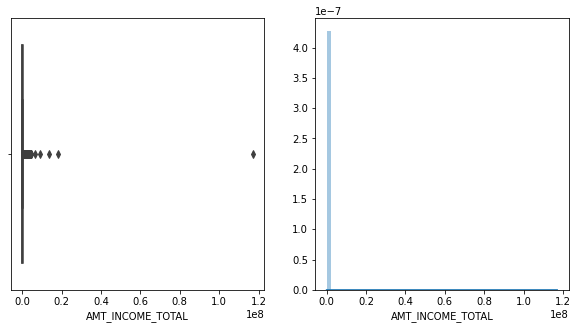

In [32]:
#Applying box plot to test for outliers in AMT_INCOME_TOTAL
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.boxplot(application['AMT_INCOME_TOTAL'])
plt.subplot(1,2,2)
sns.distplot(application['AMT_INCOME_TOTAL'])
plt.show()

In [33]:
#Checking the % of people with AMT_INCOME>400000
len(application[application['AMT_INCOME_TOTAL']>400000])/len(application)

0.02622020025299908

In [34]:
#Applying describe() on AMT_INCOME
application['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

`Conclusion`:We can clearly see that there are so many outliers in this column. The IQR clculated is 90000. If we would want to fix them , we can go ahead by dropping the values more than 4,00,000 rupees. As only 2% of the data is more than that value.

**Checking outliers for column:AMT_CREDIT**

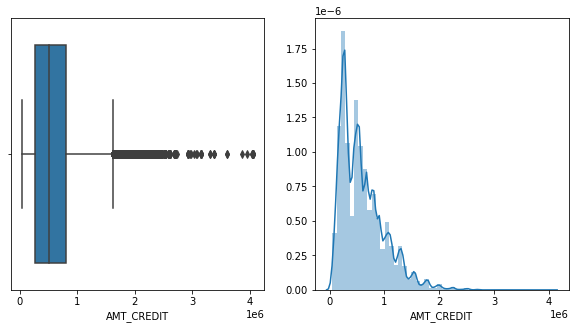

In [35]:
#Using boxplot() and distplot() to identify outliers in AMT_CREDIT,
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.boxplot(application['AMT_CREDIT'])
plt.subplot(1,2,2)
sns.distplot(application['AMT_CREDIT'])
plt.show()

In [36]:
#USing describe() on AMT_CREDIT.
application['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [37]:
#To check the % of people with AMT_CREDIT<1600000.
len(application[application['AMT_CREDIT']<1600000])/len(application)

0.9782186653485566

`Conclusion`:As there are few outliers in the data, we can go ahead and deal it by dropping those rows. Rows with Values more than 16,00,000 rupees can dropped.

**Checking outliers for column:AMT_ANNUITY**

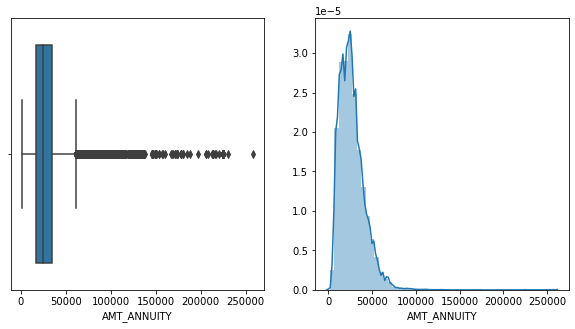

In [38]:
#Applying boxplot() and distplot() to  identify outliers.
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.boxplot(application['AMT_ANNUITY'])
plt.subplot(1,2,2)
sns.distplot(application['AMT_ANNUITY'])
plt.show()

In [39]:
#Using describe() to see the quantiles and mean of AMT_ANNUITY.
application['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [40]:
#Calculating the % of people with ANN_ANNUITY>60000.
len(application[application['AMT_ANNUITY']>60000])/len(application)

0.02644458247022058

`Conclusion`:In AMT_ANNUITY column we can observe that there are few outliers. Values more than 60,000 rupees are outliers. Since only 2% of the data is more than that, we can go ahead in dropping them.

**Checking outliers for column:REGION_POPULATION_RELATIVE**

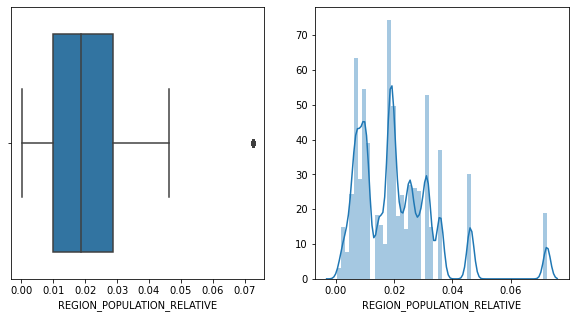

In [41]:
#Applying Boxplot() and distplot() on REGION_POPULATION_RELATIVE to check for outliers
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.boxplot(application['REGION_POPULATION_RELATIVE'])
plt.subplot(1,2,2)
sns.distplot(application['REGION_POPULATION_RELATIVE'])
plt.show()

In [42]:
#Using describe() on REGION_POPULATION_RELATIVE to check for quantiles and mean.
application['REGION_POPULATION_RELATIVE'].describe()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [43]:
# Finding the % of people with REGION_POPUlATION_RELATIVE]>0.06.
len(application[application['REGION_POPULATION_RELATIVE']>0.06])/len(application)

0.02735511900387303

`Conclusion`:REGION_POPULATION_RELATIVE when obsereved, we founnd many outliers. The values of this outliers are more than 0.6. Hence it is best to drop the rows with values of this column more than 0.6

**Checking outliers for column:CNT_CHILDREN**

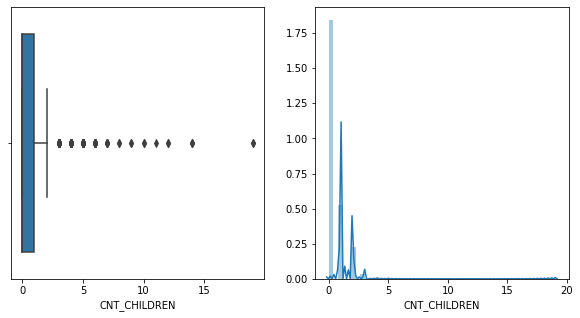

In [44]:
#Applying boxplot() and distplot() to check for outliers in "CNT_CHILDREN"
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.boxplot(application['CNT_CHILDREN'])
plt.subplot(1,2,2)
sns.distplot(application['CNT_CHILDREN'])
plt.show()

In [45]:
#Using describe() to check for quantiles and mean of CNT_CHILDREN
application['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [46]:
#Calculating % of people with CNT_CHILDREN>3.
len(application[application['CNT_CHILDREN']>3])/len(application)

0.00180481348634683

`Conclusion`:CNT_CHILDREN columns also have outliers. Values more than 3 are just 0.1%. Hence we should opt for deleting those rows or bin it into one value.

<a id="Bin"></a>
- ###  Subtask 2.4: Binning of Continous Data

In [47]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307507 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [48]:
#Binning Age of the data
age=application['DAYS_BIRTH'].abs()/365
application["age_group"]=pd.cut(age,[0,30,40,50,60,9999],labels=["<30","30-40","40-50","50-60","60+"])

In [49]:
#Applying value_counts() on age column.
application.age_group.value_counts()

30-40    82308
40-50    76541
50-60    68062
<30      45021
60+      35579
Name: age_group, dtype: int64

In [50]:
#Binning of period of since registerations of the customers.
regi=application['DAYS_REGISTRATION'].abs()/365
application['CUSTOMER_REG_CATEGORY']=pd.cut(regi,[0,2,5,10,20,999],labels=["Extremely New Customer","New Customer","Medium Customer","Old Customer","Extremely Old Customer"])

In [51]:
application.CUSTOMER_REG_CATEGORY.value_counts()

Old Customer              100657
Extremely Old Customer     80639
Medium Customer            54614
New Customer               39130
Extremely New Customer     32391
Name: CUSTOMER_REG_CATEGORY, dtype: int64

<a id="Analysis"></a>
## Task 3: Analysis 

In [52]:
#Checking the imbalance percent of the target variable.
application['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

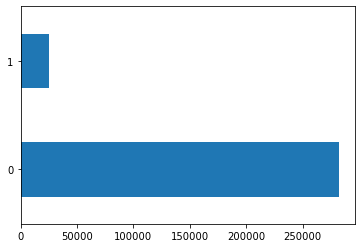

In [53]:
# Plotting a horizontal bar graph to check for the imbalance in "TARGET" variable.
application['TARGET'].value_counts().plot.barh()
plt.grid(b=False)
plt.show()

The target variable is defined as: 
- 1: If the client faces difficulty in paying any installment of the loan. (Only 10% of people in the data are not able to repay the loan on time)
- 0: If the client is able to pay all the installments. (90% of the people in the data are able pay the loan on time)

One can clearly see that our data is extremely imbalance.  

**Dividing The DATA INTO TWO SETS.**
- T1: in this dataframe, target variable wil be 1
- T0: in this dataframe, target variable wil be 0

In [54]:
#Createing dataframe with target=0
T0=application[application["TARGET"]==0]
T0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age_group,CUSTOMER_REG_CATEGORY
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,New Customer
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,Old Customer
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,50-60,Extremely Old Customer
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,Old Customer
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,40-50,Old Customer


In [55]:
#Createing dataframe with target=1
T1=application[application["TARGET"]==1]
T1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age_group,CUSTOMER_REG_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,<30,Medium Customer
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573,-1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,50-60,Old Customer
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182,-1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,40-50,New Customer
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45,-4409,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,-1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,30-40,Extremely New Customer
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,-5391,-4199,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,None,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,60+,Old Customer


<a id="Uni"></a>
>### Subtask 1. Univariate Analysis

**Analysing NAME_CONTRACT_TYPE**

In [56]:
#Applying Value Counts on 'NAME_CONTRACT_TYPE' for T0 dataframe.
T0['NAME_CONTRACT_TYPE'].value_counts(normalize=True)

Cash loans         0.9021
Revolving loans    0.0979
Name: NAME_CONTRACT_TYPE, dtype: float64

In [57]:
#Applying Value Counts on 'NAME_CONTRACT_TYPE' for T1 dataframe.
T1['NAME_CONTRACT_TYPE'].value_counts(normalize=True)

Cash loans         0.935388
Revolving loans    0.064612
Name: NAME_CONTRACT_TYPE, dtype: float64

As we already know that there is huge difference in size of both the dataframes, hence in order to compare the results of the frequency we though it it better to normalize them, as it'll show the relative count.

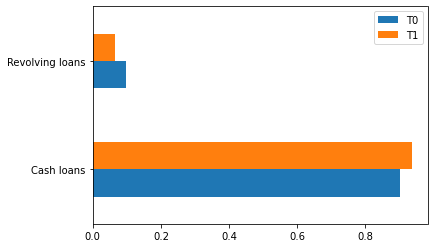

In [58]:
#T0['NAME_CONTRACT_TYPE'].value_counts(normalize=True).plot.barh()
index = ['Cash loans','Revolving loans']
df = pd.DataFrame({'T0': T0['NAME_CONTRACT_TYPE'].value_counts(normalize=True),'T1': T1['NAME_CONTRACT_TYPE'].value_counts(normalize=True)}, index=index)
ax = df.plot.barh()

`Inference`: 

1. 93% of non-Defaulters could repay Cash loan and 7% of them could repay Revolvng loan
2. We can see that 90% of defaulted people defaulted in Cash loan and 10% defaulted in Revolving loan 

**Analysis on NAME_EDUCATION_TYPE**

In [59]:
#Applying value_counts() on NAME_EDUCATION_TYPE of T0 dataframe
T0['NAME_EDUCATION_TYPE'].value_counts(normalize=True)

Secondary / secondary special    0.703491
Higher education                 0.250646
Incomplete higher                0.033270
Lower secondary                  0.012024
Academic degree                  0.000570
Name: NAME_EDUCATION_TYPE, dtype: float64

In [60]:
#Applying value_counts() on NAME_EDUCATION_TYPE of T1 dataframe
T1['NAME_EDUCATION_TYPE'].value_counts(normalize=True)

Secondary / secondary special    0.786465
Higher education                 0.161490
Incomplete higher                0.035126
Lower secondary                  0.016798
Academic degree                  0.000121
Name: NAME_EDUCATION_TYPE, dtype: float64

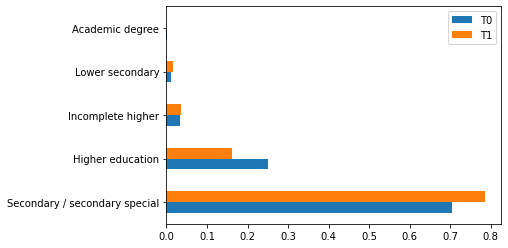

In [61]:
#Plotting barh on value_counts()
index = ['Secondary / secondary special','Higher education','Incomplete higher','Lower secondary','Academic degree']
df = pd.DataFrame({'T0': T0['NAME_EDUCATION_TYPE'].value_counts(normalize=True),'T1': T1['NAME_EDUCATION_TYPE'].value_counts(normalize=True)}, index=index)
ax = df.plot.barh()

`Inferences`:

1. One can see that the proportion of people failing to pay the loan is lower than the proportion of people who are able to with higher education.
2. The 78% of defaulter are with Secondary education, 25% are of higher education and 3% are with incomplete education

**Analysis on NAME_INCOME_TYPE**

In [62]:
#Applying value_counts() on NAME_INCOME_TYPE for T0 dataframe
T0['NAME_INCOME_TYPE'].value_counts(normalize=True)

Working                 0.507807
Commercial associate    0.234384
Pensioner               0.185294
State servant           0.072356
Student                 0.000064
Unemployed              0.000050
Businessman             0.000035
Maternity leave         0.000011
Name: NAME_INCOME_TYPE, dtype: float64

In [63]:
#Applying value_counts on NAME_INCOME_TYPE for T1 dataframe
T1['NAME_INCOME_TYPE'].value_counts(normalize=True)

Working                 0.613253
Commercial associate    0.215911
Pensioner               0.120121
State servant           0.050312
Unemployed              0.000322
Maternity leave         0.000081
Name: NAME_INCOME_TYPE, dtype: float64

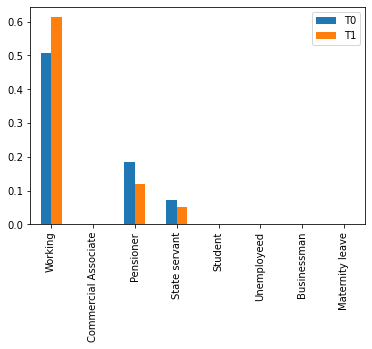

In [64]:
#Plotting bar chart to understand Income type of the customers6
index = ['Working','Commercial Associate','Pensioner','State servant','Student','Unemployeed','Businessman','Maternity leave']
df = pd.DataFrame({'T0': T0['NAME_INCOME_TYPE'].value_counts(normalize=True),'T1': T1['NAME_INCOME_TYPE'].value_counts(normalize=True)}, index=index)
ax = df.plot.bar()

`Inference`:
1. 61% of defaulters are from working category,12% are from prnsioner category ,21% are from commercial associate.
2. 50% of non defaulters are from Working category, 18% from pensioner category 23% are from commercial associate category.

**Analysis on NAME_FAMILY_STATUS**

In [65]:
#Applying value_counts() on NAME_FAMILY_STATUS on T0 DataFrame
T0['NAME_FAMILY_STATUS'].value_counts(normalize=True)

Married                 0.642345
Single / not married    0.144991
Civil marriage          0.094854
Separated               0.064206
Widow                   0.053597
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64

In [66]:
#Applying value_counts() on NAME_FAMILY_STATUS  on T1 Dataframe
T1['NAME_FAMILY_STATUS'].value_counts(normalize=True)

Married                 0.598187
Single / not married    0.179537
Civil marriage          0.119275
Separated               0.065257
Widow                   0.037744
Name: NAME_FAMILY_STATUS, dtype: float64

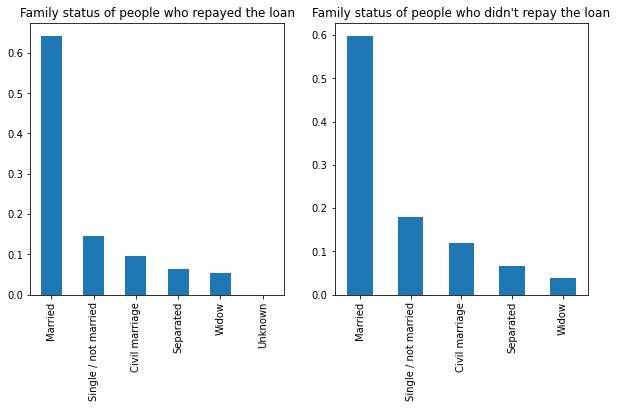

In [67]:
#Plotting bar charts to understand the frequency. 
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
T0['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot.bar()
plt.title("Family status of people who repayed the loan")
plt.subplot(1,2,2)
T1['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot.bar()
plt.title("Family status of people who didn't repay the loan")
plt.show()

`Inferences`:One can see that the pattern of the frequncy for FAMILY_STATUS is similar for defaulters as well as non-defaulter

**Analysis on CODE_GENDER**

In [68]:
#Applying value_counts() on CODE_GENDER for T0 dataframe
T0['CODE_GENDER'].dropna().value_counts(normalize=True)

F    0.666042
M    0.333958
Name: CODE_GENDER, dtype: float64

In [69]:
#Applying value_counts on CODE_GENDER for T1 dataframe
T1['CODE_GENDER'].value_counts(normalize=True)

F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64

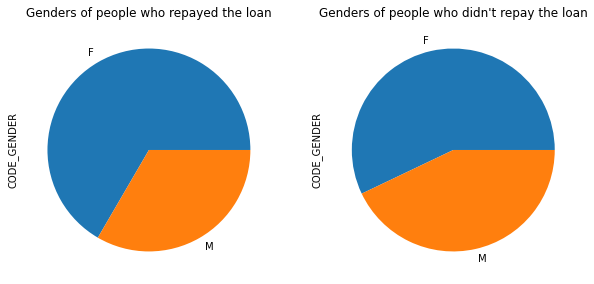

In [70]:
#Applying Pie chart to view the distribution.
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
T0['CODE_GENDER'].dropna().value_counts(normalize=True).plot.pie()
plt.title("Genders of people who repayed the loan")
plt.subplot(1,2,2)
T1['CODE_GENDER'].value_counts(normalize=True).plot.pie()
plt.title("Genders of people who didn't repay the loan")
plt.show()

`Inferences`: The % of males is less in deafulters than in non defaulters. And % of females is mor in non-defaulters tha defaulters. 

**Analysis on OCCUPATION_TYPE**

In [71]:
#Applying value_counts() on OCCUPATION_TYPE on T0 dataframe.
T0['OCCUPATION_TYPE'].dropna().value_counts(normalize=True)

Laborers                 0.256256
Sales staff              0.150644
Core staff               0.134141
Managers                 0.104080
Drivers                  0.085661
High skill tech staff    0.055454
Accountants              0.048496
Medicine staff           0.041361
Security staff           0.031152
Cooking staff            0.027652
Cleaning staff           0.021841
Private service staff    0.012863
Low-skill Laborers       0.009004
Secretaries              0.006299
Waiters/barmen staff     0.006211
Realty agents            0.003593
HR staff                 0.002737
IT staff                 0.002555
Name: OCCUPATION_TYPE, dtype: float64

In [72]:
#Applying value_counts() on OCCUPATION_TYPE on T1 dataframe.
T1['OCCUPATION_TYPE'].value_counts(normalize=True)

Laborers                 0.314768
Sales staff              0.166712
Drivers                  0.113603
Core staff               0.093708
Managers                 0.071602
Security staff           0.038928
High skill tech staff    0.037796
Cooking staff            0.033483
Medicine staff           0.030841
Accountants              0.025557
Cleaning staff           0.024101
Low-skill Laborers       0.019356
Private service staff    0.009435
Waiters/barmen staff     0.008195
Secretaries              0.004960
Realty agents            0.003181
HR staff                 0.001941
IT staff                 0.001833
Name: OCCUPATION_TYPE, dtype: float64

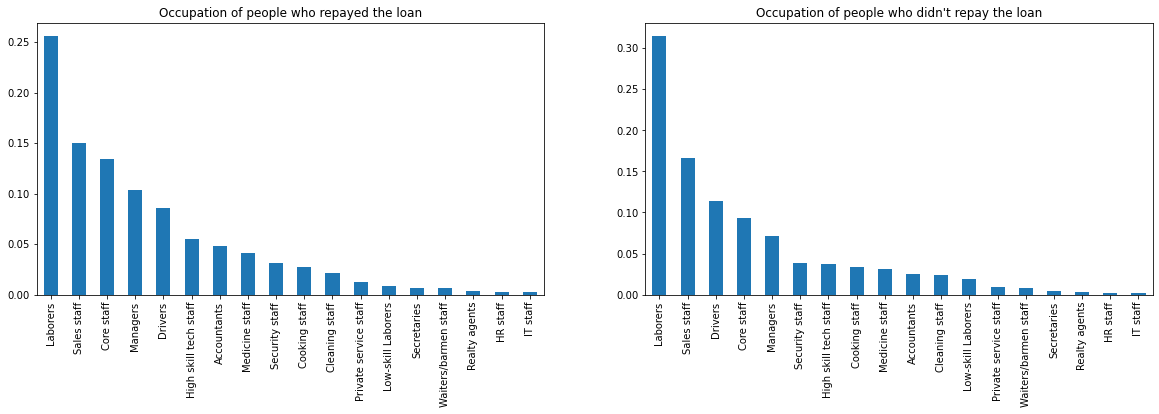

In [73]:
#Drawing barchart to visualize the dstribution. 
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
T0['OCCUPATION_TYPE'].dropna().value_counts(normalize=True).plot.bar()
plt.title("Occupation of people who repayed the loan")
plt.subplot(1,2,2)
T1['OCCUPATION_TYPE'].value_counts(normalize=True).plot.bar()
plt.title("Occupation of people who didn't repay the loan")
plt.show()

`Inferences`: The % distribution for both defaulters and non-defaulters is same in Occuation_type column.

**Analysis on ORGANIZATION_TYPE**

In [74]:
#Applying value_counts() on ORGANISATION_TYPE for T0 Dataframe.
T0['ORGANIZATION_TYPE'].dropna().value_counts(normalize=True)

Business Entity Type 3    0.267774
Self-employed             0.149821
Other                     0.066903
Medicine                  0.045401
Government                0.042023
Business Entity Type 2    0.041915
School                    0.036331
Trade: type 7             0.030790
Kindergarten              0.027772
Construction              0.025775
Business Entity Type 1    0.023869
Transport: type 4         0.021263
Industry: type 9          0.013647
Trade: type 3             0.013595
Industry: type 3          0.012722
Security                  0.012692
Housing                   0.011824
Military                  0.010851
Industry: type 11         0.010725
Bank                      0.010321
Police                    0.009657
Agriculture               0.009540
Transport: type 2         0.008823
Postal                    0.008576
Security Ministries       0.008155
Trade: type 2             0.007673
Restaurant                0.006943
Services                  0.006387
University          

In [75]:
#Applying value_counts() on ORGANISATION_TYPE for T0 Dataframe.
T1['ORGANIZATION_TYPE'].dropna().value_counts(normalize=True)

Business Entity Type 3    0.289581
Self-employed             0.178979
Other                     0.058392
Business Entity Type 2    0.041218
Construction              0.035951
Trade: type 7             0.033891
Medicine                  0.033753
Government                0.033249
School                    0.024090
Transport: type 4         0.022945
Business Entity Type 1    0.022304
Kindergarten              0.022166
Trade: type 3             0.016533
Industry: type 3          0.015938
Security                  0.014839
Agriculture               0.011770
Housing                   0.010763
Industry: type 11         0.010717
Industry: type 9          0.010305
Restaurant                0.009709
Transport: type 3         0.008564
Postal                    0.008335
Transport: type 2         0.007877
Military                  0.006183
Trade: type 2             0.006091
Bank                      0.005954
Police                    0.005358
Industry: type 1          0.005267
Industry: type 7    

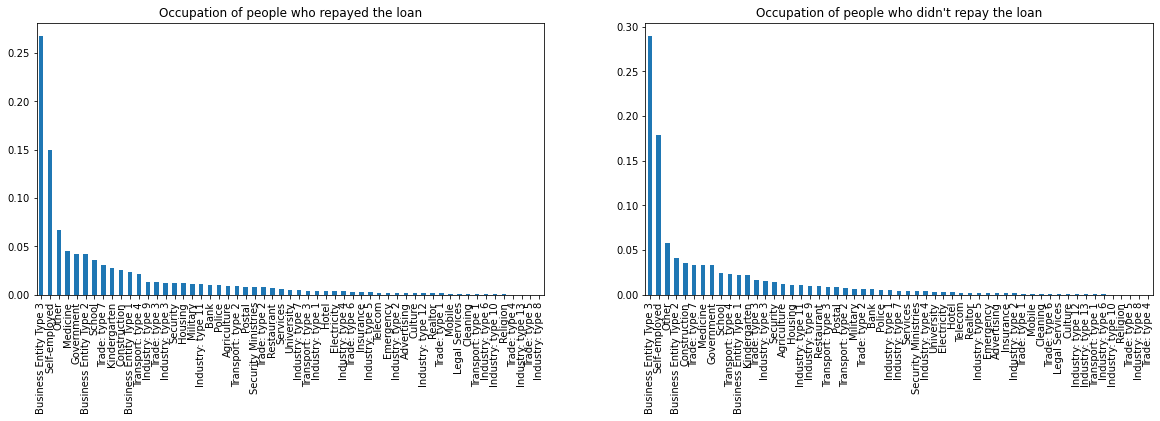

In [76]:
#Drawing a bar chart to view the distributon.
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
T0['ORGANIZATION_TYPE'].dropna().value_counts(normalize=True).plot.bar()
plt.title("Occupation of people who repayed the loan")
plt.subplot(1,2,2)
T1['ORGANIZATION_TYPE'].dropna().value_counts(normalize=True).plot.bar()
plt.title("Occupation of people who didn't repay the loan")
plt.show()

`Inferences`: There doesn't seem to be a significant difference in the distrbution of occupation for defaulters and non-defaulter.

**Analysis on DAYS_BIRTH**

In [77]:
#making a List for age of people in Datafram T1
ageT1=T1['DAYS_BIRTH'].abs()/365

In [78]:
#making a List for age of people in Datafram T0
ageT0=T0['DAYS_BIRTH'].abs()/365

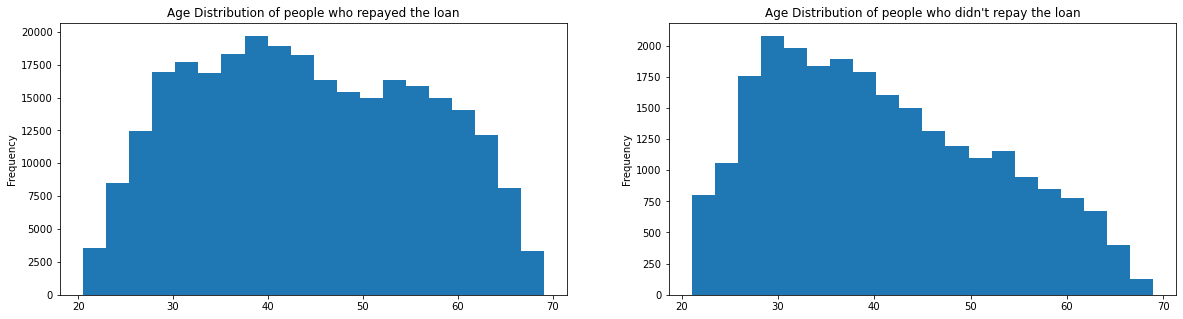

In [79]:
#Drawing histograph to see the distribution of age in T1 and T0.
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ageT0.plot.hist(bins=20)
plt.title("Age Distribution of people who repayed the loan")
plt.subplot(1,2,2)
ageT1.plot.hist(bins=20)
plt.title("Age Distribution of people who didn't repay the loan")
plt.show()

`Inferences`:
1. The % of people in the age group 30-35 is more in defaulters than in non-defaulters.
2. The % of people in defaulters decreases with age after 30 years of age|

**Analysis on CNT_FAM_MEMBERS**

In [80]:
#Applying value_counts() on CNT_FAM_MEMBERS on T0 Dataframe
T0['CNT_FAM_MEMBERS'].value_counts()

2.0     146348
1.0      62172
3.0      47993
4.0      22561
5.0       3151
6.0        353
7.0         75
8.0         14
9.0          6
12.0         2
20.0         2
10.0         2
16.0         2
14.0         2
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [81]:
#Applying value_counts() on CNT_FAM_MEMBERS on T1 Dataframe
T1['CNT_FAM_MEMBERS'].value_counts()

2.0     12009
1.0      5675
3.0      4608
4.0      2136
5.0       327
6.0        55
7.0         6
8.0         6
11.0        1
10.0        1
13.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

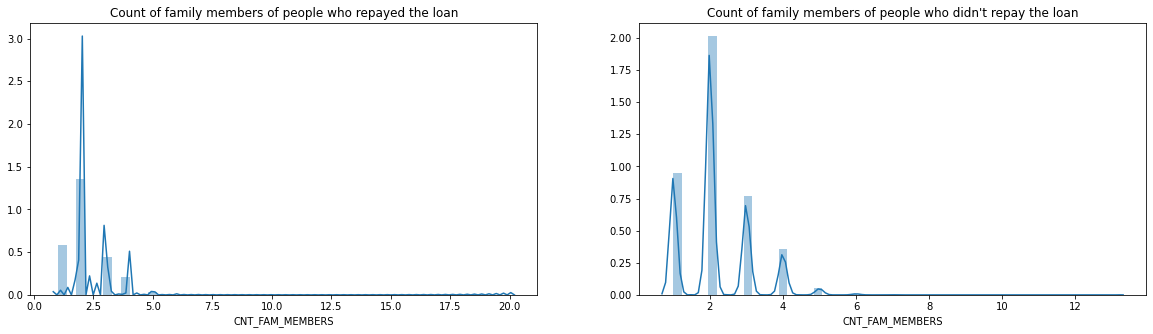

In [82]:
# Drawing distplot() to see the distribution of age for defalters and non defaluters.
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sns.distplot(T0['CNT_FAM_MEMBERS'])
plt.title("Count of family members of people who repayed the loan")
plt.subplot(1,2,2)
sns.distplot(T1['CNT_FAM_MEMBERS'])
plt.title("Count of family members of people who didn't repay the loan")
plt.show()

`Inference` :
The distribution of count of family members seems similar for both the dataframes.

<a id="Bi"></a>
>### Subtask 2. Bivariate Analysis

In [83]:
#Using info() to get the names of columns
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307507 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

Below are the columns which we feel are useful for our analysis and understanding.
We are considering it solely through our understanding of the problem and our instincts.

"SK_ID_CURR", "TARGET", "NAME_CONTRACT_TYPE", "CODE_GENDER","CNT_CHLDREN","AMT_INCOME_TOTAL","AMT_ANNUITY","AMT_CREDIT","NAME_INCOME_TYPE",
"NAME_EDUCATION_TYPE","NAME_FAMMILY","DAYS_BIRTH","DAYS_REGISTRATION","OCCUPATION_TYPE","CNT_FAM_MEMBERS",
"REGION_RATING_CLIENT","ORGANIZATION_TYPE","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE",
"OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"

**AMT_CREDIT vs AMT_INCOME_TOTAL(CONTINOUS vs CONTINOUS)**

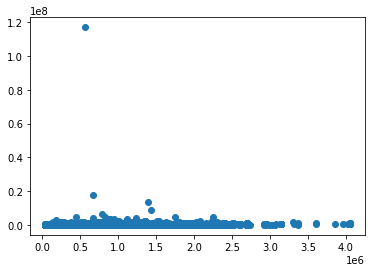

In [84]:
#Applying scatter plot on AMT_CREDIT and AMT_INCOME_TOTAL for application data.
plt.scatter(application['AMT_CREDIT'] ,application['AMT_INCOME_TOTAL'])
plt.show()

As there are many outliers in this column we aren't getting a proper graph for how the data is distributed.
Drawing another graph to view the distribution of the data after dropping na values

In [85]:
# Creating a temporary file with AMT_CREDIT<1600000 after dropping outliers
temp=application[application['AMT_CREDIT']<1600000]

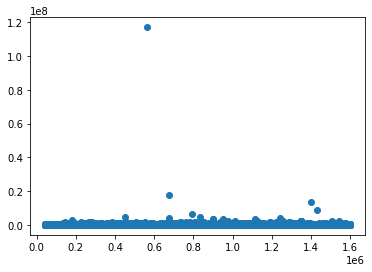

In [86]:
#Applying scatter plot on AMT_CREDIT and AMT_INCOME_TOTAL for application data.
plt.scatter(temp['AMT_CREDIT'] ,temp['AMT_INCOME_TOTAL'])
plt.show()

`Inferences`: There isn't a good correlation between Credit and Income even after dropping the outlier.

**AMT_CREDIT vs CNT_CHLDREN(CONTINOUS vs CONTINOUS)**

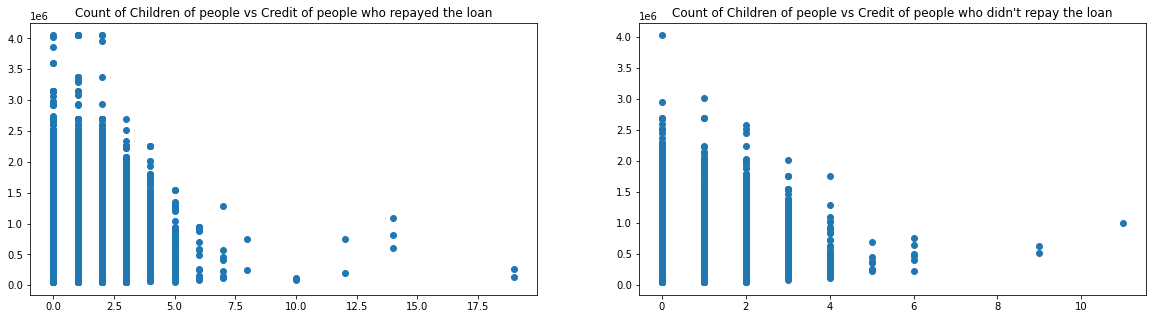

In [87]:
#Applying Scatter plot on CNT_CHILDREN and  AMT_CREDIT on T1 and T0 dataframe
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.scatter(T0['CNT_CHILDREN'] ,T0['AMT_CREDIT'])
plt.title("Count of Children of people vs Credit of people who repayed the loan")
plt.subplot(1,2,2)
plt.scatter(T1['CNT_CHILDREN'] ,T1['AMT_CREDIT'])
plt.title("Count of Children of people vs Credit of people who didn't repay the loan")
plt.show()

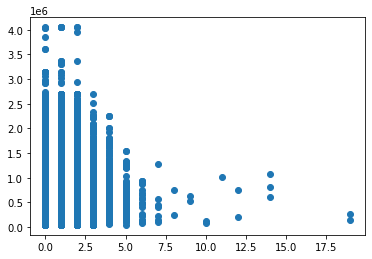

In [88]:
#Applying Scatter plot on CNT_CHILDREN and  AMT_CREDIT on application dataframe
plt.scatter(application['CNT_CHILDREN'] ,application['AMT_CREDIT'])
plt.show()

`Inferences`:
1. We can Infere from the graph that peope with higher numerber of children do not generally tend to go for the loan.
2. Also there isn't much difference in the pattern of having children and the credit they have for both defaulters and non-
defaulters

**AMT_CREDIT vs AMT_ANNUITY(CONTINOUS vs CONTINOUS)**

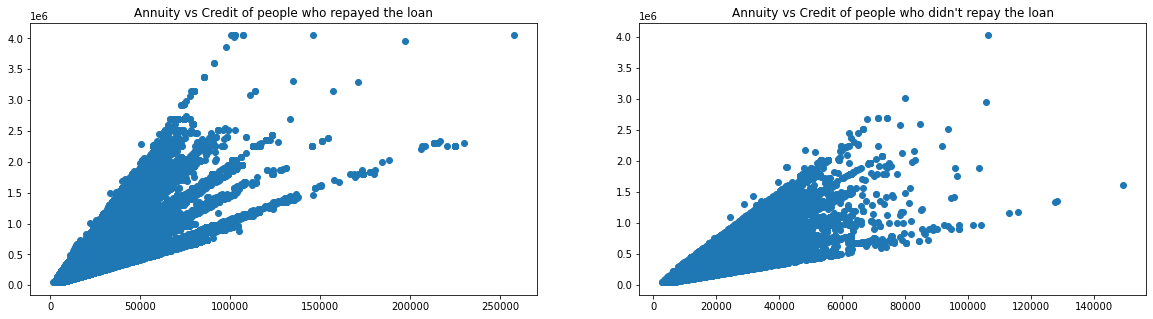

In [89]:
#Applying scatter plot on AMT_ANNUITY and AMT_CREDIT on T1 and T0 dataframes.
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.scatter(T0['AMT_ANNUITY'] ,T0['AMT_CREDIT'])
plt.title("Annuity vs Credit of people who repayed the loan")
plt.subplot(1,2,2)
plt.scatter(T1['AMT_ANNUITY'] ,T1['AMT_CREDIT'])
plt.title("Annuity vs Credit of people who didn't repay the loan")
plt.show()

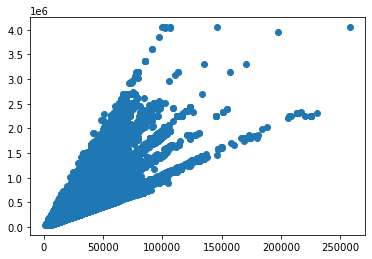

In [90]:
#Applying scatter plot on AMT_ANNUITY and AMT_CREDIT on application dataframes.
plt.scatter(application['AMT_ANNUITY'] ,application['AMT_CREDIT'])
plt.show()


`Inferences`:We can see that Annuity is proportional to Credit. Higher the credit on the person, higher is the annuity.
This was seen for both people who defaulted and people who didn't

**AMT_CREDIT vs AMT_AGE(CONTINOUS vs CONTINOUS)**

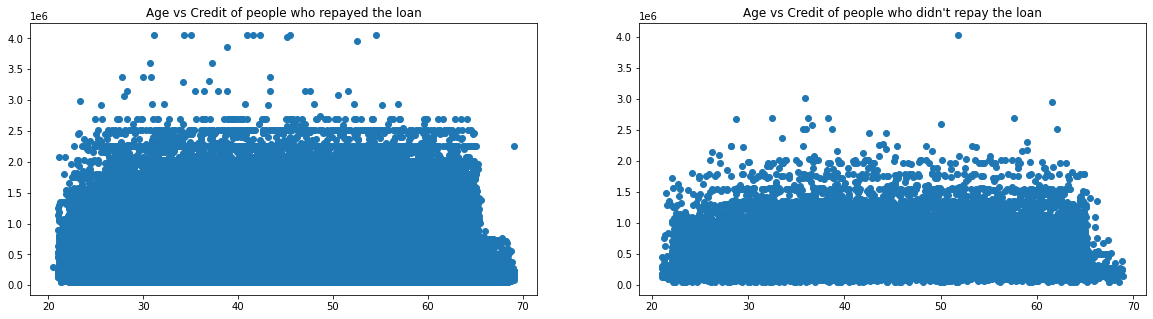

In [91]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.scatter(ageT0 ,T0['AMT_CREDIT'])
plt.title("Age vs Credit of people who repayed the loan")
plt.subplot(1,2,2)
plt.scatter(ageT1 ,T1['AMT_CREDIT'])
plt.title("Age vs Credit of people who didn't repay the loan")
plt.show()

`Inferences`:
Age of the people and Credit of the people are not correlated for both the dataframes

**NAME_CONTRACT_TYPE vs NAME_EDUCATION_TYPE(CATEGORICAL vs CATEGORICAL)**

In [92]:
# Making a crosstable to view the frequency of people according to education and contract for people who successfuly repayed the loan.
pd.crosstab(index=T0["NAME_CONTRACT_TYPE"],columns=T0["NAME_EDUCATION_TYPE"],normalize="columns")

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
NAME_CONTRACT_TYPE,,,,,
Cash loans,0.888199,0.869774,0.875066,0.94469,0.914179
Revolving loans,0.111801,0.130226,0.124934,0.05531,0.085821


In [93]:
# Making a crosstable to view the frequency of people according to education and contract for people who failed to repay the loan.
pd.crosstab(index=T1["NAME_CONTRACT_TYPE"],columns=T1["NAME_EDUCATION_TYPE"],normalize="columns")

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
NAME_CONTRACT_TYPE,,,,,
Cash loans,1.0,0.921427,0.919725,0.952038,0.938588
Revolving loans,0.0,0.078573,0.080275,0.047962,0.061412


`Inferences`:
1. Of all the people who could repay the loan and with accedemic degree, 88% repayed Cash loan and 12% repayed Revolving loan.
2.   Of all the people who could not repay the loan and with accedemic degree, 100% failed in repaying Cash loan and 0% failed in repaying Revolving loan.

3. Of all the people who could repay the loan and with incomplete higher education, 87% repayed repayed cash loans and 13% repayed Revolving,
4.   Of all the people who could not repay the loan and with incomplete higher education, 92% failed in repaying Cash loan and 8% failed in repaying Revolving loan.


**NAME_CONTRACT_TYPE vs NAME_INCOME_TYPE(CATEGOICAL vs CATEGORICAL)**

In [94]:
# Making a crosstable to view the frequency of people according to income type and contract for people who successfuly repayed the loan.
pd.crosstab(index=T0["NAME_CONTRACT_TYPE"],columns=T0["NAME_INCOME_TYPE"],normalize="columns")

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
NAME_CONTRACT_TYPE,,,,,,,,
Cash loans,0.0,0.885371,0.0,0.938354,0.911704,0.833333,0.5,0.895354
Revolving loans,1.0,0.114629,1.0,0.061646,0.088296,0.166667,0.5,0.104646


In [95]:
# Making a crosstable to view the frequency of people according to income type and contract for people who failed to repay the loan.
pd.crosstab(index=T1["NAME_CONTRACT_TYPE"],columns=T1["NAME_INCOME_TYPE"],normalize="columns")

NAME_INCOME_TYPE,Commercial associate,Maternity leave,Pensioner,State servant,Unemployed,Working
NAME_CONTRACT_TYPE,,,,,,
Cash loans,0.93097,1.0,0.953052,0.951161,1.0,0.932147
Revolving loans,0.06903,0.0,0.046948,0.048839,0.0,0.067853


`Inference`:
1. Of those who are not a defaulter and are commercial associate, 88% repayed cash loan and 12% repayed Revolving loans
2. Of those who are defaulter and are commercial associate,93% failed in repaying cash loans and 7% failed in repaying revolving loans 


`Note`: All the students and buisnessman who were analysed didn't default. Athought he number of people analysed is very low. Hence These categories shouldn't be consdered untill we have equal representation of this class of Income type.

In [96]:
#Printing the count of stundets and businessman analsed overall.
print(len(application[application['NAME_INCOME_TYPE']=="Student"]))
print(len(application[application['NAME_INCOME_TYPE']=="Businessman"]))

18
10


**NAME_CONTRACT_TYPE vs NAME_FAMILY_STATUS(CATEGORICAL vs CATEGORICAL)**

In [97]:
# Making a crosstable to view the frequency of people according to Family status and contract for people who successfuly repayed the loan.
pd.crosstab(index=T0["NAME_CONTRACT_TYPE"],columns=T0["NAME_FAMILY_STATUS"],normalize="columns")

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
NAME_CONTRACT_TYPE,,,,,,
Cash loans,0.903148,0.907254,0.899504,0.869495,0.0,0.929906
Revolving loans,0.096852,0.092746,0.100496,0.130505,1.0,0.070094


In [98]:
# Making a crosstable to view the frequency of people according to Family status and contract for people who successfuly repayed the loan.
pd.crosstab(index=T0["NAME_CONTRACT_TYPE"],columns=T0["NAME_FAMILY_STATUS"],normalize=True)

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
NAME_CONTRACT_TYPE,,,,,,
Cash loans,0.085667,0.582770,0.057753,0.126069,0.000000,0.049840
Revolving loans,0.009187,0.059575,0.006452,0.018922,0.000007,0.003757


In [99]:
# Making a crosstable to view the frequency of people according to Family status and contract for people who failed to repay the loan.
pd.crosstab(index=T1["NAME_CONTRACT_TYPE"],columns=T1["NAME_FAMILY_STATUS"],normalize="columns")

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Widow
NAME_CONTRACT_TYPE,,,,,
Cash loans,0.933468,0.940741,0.938272,0.913395,0.956243
Revolving loans,0.066532,0.059259,0.061728,0.086605,0.043757


`Inferences`:
1. Of those who are non-Defaulters and are divorced, 90% repayed cash loan successfully, 10% repayed revolving loan.
2. Of those who are non-Defaulters, 59% of the people are Married and were succussful in repaying the Cash loan.
3. Of those who are defaulters and have divorced, 94% of them failed to repay Cash Loans and 6% failed to repay Revolving loans.

**NAME_CONTRACT_TYPE vs OCCUPATION_TYPE(CATEGORICAL vs CATEGORICAL)**

In [100]:
# Making a crosstable to view the frequency of people according to Family status and contract for people who successfuly repayed the loan.
pd.crosstab(index=T0["NAME_CONTRACT_TYPE"],columns=T0["OCCUPATION_TYPE"],normalize="columns")

OCCUPATION_TYPE,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
NAME_CONTRACT_TYPE,,,,,,,,,,,,,,,,,,
Cash loans,0.875147,0.909653,0.912676,0.881271,0.924224,0.844402,0.876955,0.786585,0.904636,0.914648,0.873023,0.90521,0.888575,0.895954,0.885936,0.894477,0.915819,0.863712
Revolving loans,0.124853,0.090347,0.087324,0.118729,0.075776,0.155598,0.123045,0.213415,0.095364,0.085352,0.126977,0.09479,0.111425,0.104046,0.114064,0.105523,0.084181,0.136288


In [101]:
# Making a crosstable to view the frequency of people according to Family status and contract for people who successfuly repayed the loan.
pd.crosstab(index=T1["NAME_CONTRACT_TYPE"],columns=T1["OCCUPATION_TYPE"],normalize="columns")

OCCUPATION_TYPE,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
NAME_CONTRACT_TYPE,,,,,,,,,,,,,,,,,,
Cash loans,0.915612,0.914989,0.929147,0.925777,0.950166,0.916667,0.917261,0.970588,0.940219,0.958217,0.934488,0.926573,0.902857,0.932203,0.916235,0.913043,0.947368,0.901316
Revolving loans,0.084388,0.085011,0.070853,0.074223,0.049834,0.083333,0.082739,0.029412,0.059781,0.041783,0.065512,0.073427,0.097143,0.067797,0.083765,0.086957,0.052632,0.098684


`Inferences`:
1. Of all the non-defaulters,Reality agents 90% payed Cash loans and 10% repayed revolving loan
2. Of all the defaulters,Reality agents 93% didn't pay Cash loans and 10% didn't repay revolving loan

**NAME_INCOME_TYPE vs AMT_CREDIT(CATEGORICAL vs CONTINOUS)**

In [102]:
# Applying groupby on NAME_INCOME_TYPE and AMT_CREDIT for T0 Dataframe.
T0.groupby("NAME_INCOME_TYPE")["AMT_CREDIT"].mean()

NAME_INCOME_TYPE
Businessman             1.228500e+06
Commercial associate    6.749793e+05
Maternity leave         6.300000e+05
Pensioner               5.416641e+05
State servant           6.731780e+05
Student                 5.107875e+05
Unemployed              8.431071e+05
Working                 5.814100e+05
Name: AMT_CREDIT, dtype: float64

In [103]:
8.431071e+05-626625.000000

216482.09999999998

In [104]:
# Applying groupby on NAME_INCOME_TYPE and AMT_CREDIT for T1 Dataframe.
T1.groupby("NAME_INCOME_TYPE")["AMT_CREDIT"].mean()

NAME_INCOME_TYPE
Commercial associate    607287.880410
Maternity leave         929250.000000
Pensioner               558038.827968
State servant           614816.484788
Unemployed              626625.000000
Working                 535532.043878
Name: AMT_CREDIT, dtype: float64

`Inferences`:
1. The mean of Credit taken by Commercial Associate is more for non defaulters than defaulters.
2. The mean of Credit taken by maternity leave category is more for defaulters than non-defaulters
3. The mean of Credit taken by Unemployeed non-defaulters is more than defaulters. 

**NAME_INCOME_TYPE vs AMT_CREDIT(CATEGORICAL vs CONTINOUS)**

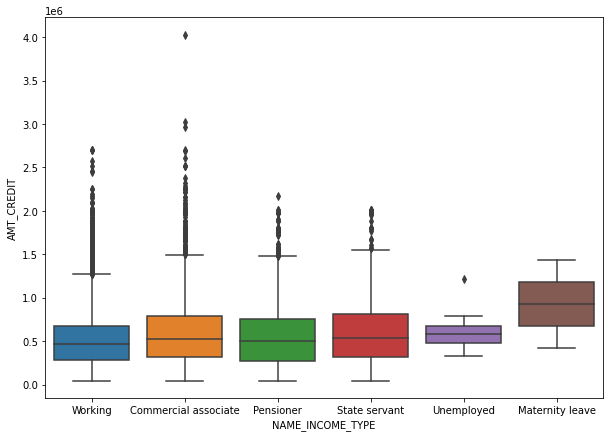

In [105]:
#Plotting box plot for NAME_INCOME_TYPE vs CREDIT.
plt.figure(figsize=[10,7])
sns.boxplot(data=T1 , x="NAME_INCOME_TYPE",y="AMT_CREDIT")
plt.show()

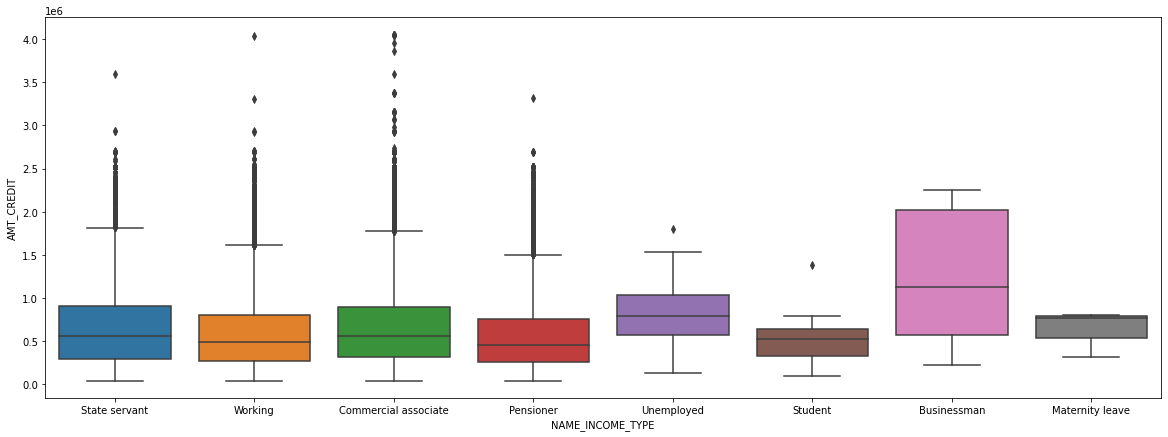

In [106]:
plt.figure(figsize=[20,7])
sns.boxplot(data=T0 , x="NAME_INCOME_TYPE",y="AMT_CREDIT")
plt.show()

`Inferences`:
1. For non-Defaulters, the median of Buissmen's AMT_CREDIT is higher than the rest of the income type.
2. for Defaulters,the median of maternity leave category's AMT_CREDIT is higher.

**NAME_CONTRACT_TYPE vs AMT_CREDIT(CATEGORICAL vs CONTINOUS)**

In [107]:
#Using groupby() on NAME_CONTRACT_TYPE and AMT_CREDIT for T0 dataframe.
T0.groupby("NAME_CONTRACT_TYPE")["AMT_CREDIT"].mean()

NAME_CONTRACT_TYPE
Cash loans         632461.030097
Revolving loans    327939.024390
Name: AMT_CREDIT, dtype: float64

In [108]:
#Using groupby() on NAME_CONTRACT_TYPE and AMT_CREDIT for T1 dataframe.
T1.groupby("NAME_CONTRACT_TYPE")["AMT_CREDIT"].mean()

NAME_CONTRACT_TYPE
Cash loans         578598.766181
Revolving loans    256365.336658
Name: AMT_CREDIT, dtype: float64

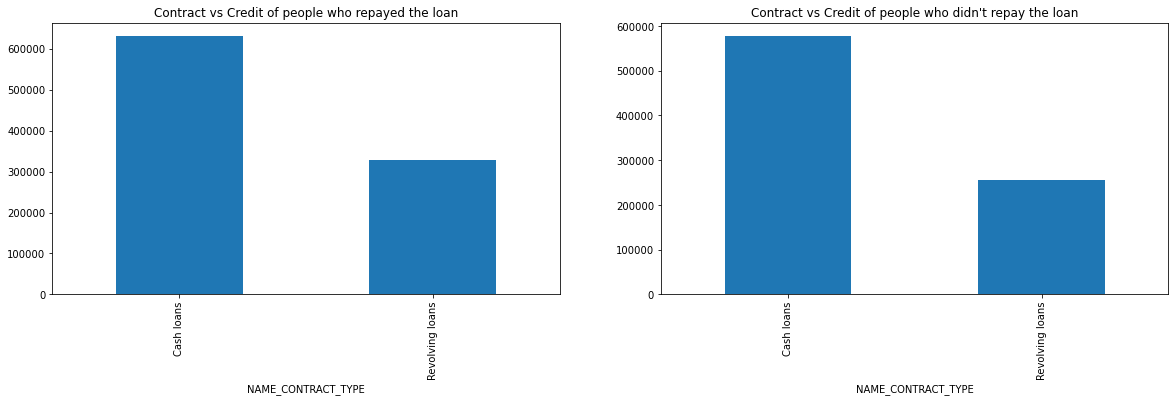

In [109]:
#Plotting Contract vs Credit bar graph.
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
T0.groupby("NAME_CONTRACT_TYPE")["AMT_CREDIT"].mean().plot.bar()
plt.title("Contract vs Credit of people who repayed the loan")
plt.subplot(1,2,2)
T1.groupby("NAME_CONTRACT_TYPE")["AMT_CREDIT"].mean().plot.bar()
plt.title("Contract vs Credit of people who didn't repay the loan")
plt.show()

`Inference`: 
1. There isn't much difference in the Contract vs Credit for both the dataframes

**NAME_CONTRACT_TYPE vs AMT_INCOME(CATEGORICAL vs CONTINOUS)**

In [110]:
#Using groupby() on NAME_CONTRACT_TYPE and AMT_TOTAL_INCOME for T0 dataframe.
T0.groupby("NAME_CONTRACT_TYPE")["AMT_INCOME_TOTAL"].mean()

NAME_CONTRACT_TYPE
Cash loans         169225.742548
Revolving loans    167713.790911
Name: AMT_INCOME_TOTAL, dtype: float64

In [111]:
#Using groupby() on NAME_CONTRACT_TYPE and AMT_INCOME_TOTAL for T1 dataframe.
T1.groupby("NAME_CONTRACT_TYPE")["AMT_INCOME_TOTAL"].mean()

NAME_CONTRACT_TYPE
Cash loans         167353.820593
Revolving loans    140392.080112
Name: AMT_INCOME_TOTAL, dtype: float64

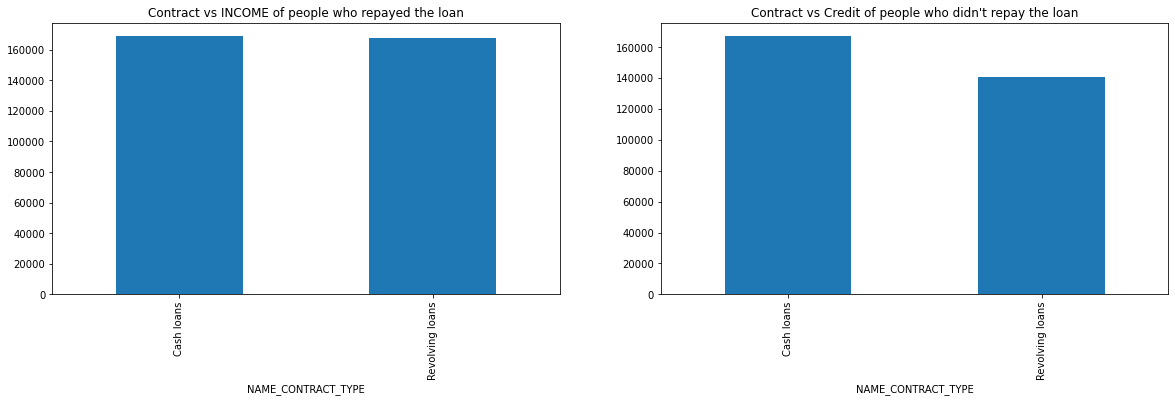

In [112]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
T0.groupby("NAME_CONTRACT_TYPE")["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.title("Contract vs INCOME of people who repayed the loan")
plt.subplot(1,2,2)
T1.groupby("NAME_CONTRACT_TYPE")["AMT_INCOME_TOTAL"].mean().plot.bar()
plt.title("Contract vs Credit of people who didn't repay the loan")
plt.show()

`Inferences`:
1. People who have defaulted and took Revolving loans have lesser income than the people who didn't default and have Revoving loans 

**Checking Correlation Coefficient of Columns with Target Variable in T1 and T2 Dataframe**

We will be checking correlation coefficient of Target variabe with only those columns which we feel are necessary and important for our analysis.

In [113]:
#Creating a teporary dataframe from T0 with favourable columns
temp1=T0[["SK_ID_CURR", "TARGET", "NAME_CONTRACT_TYPE", "CODE_GENDER","CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_ANNUITY","AMT_CREDIT","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","DAYS_BIRTH","DAYS_REGISTRATION","OCCUPATION_TYPE","CNT_FAM_MEMBERS","REGION_RATING_CLIENT","ORGANIZATION_TYPE","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]]

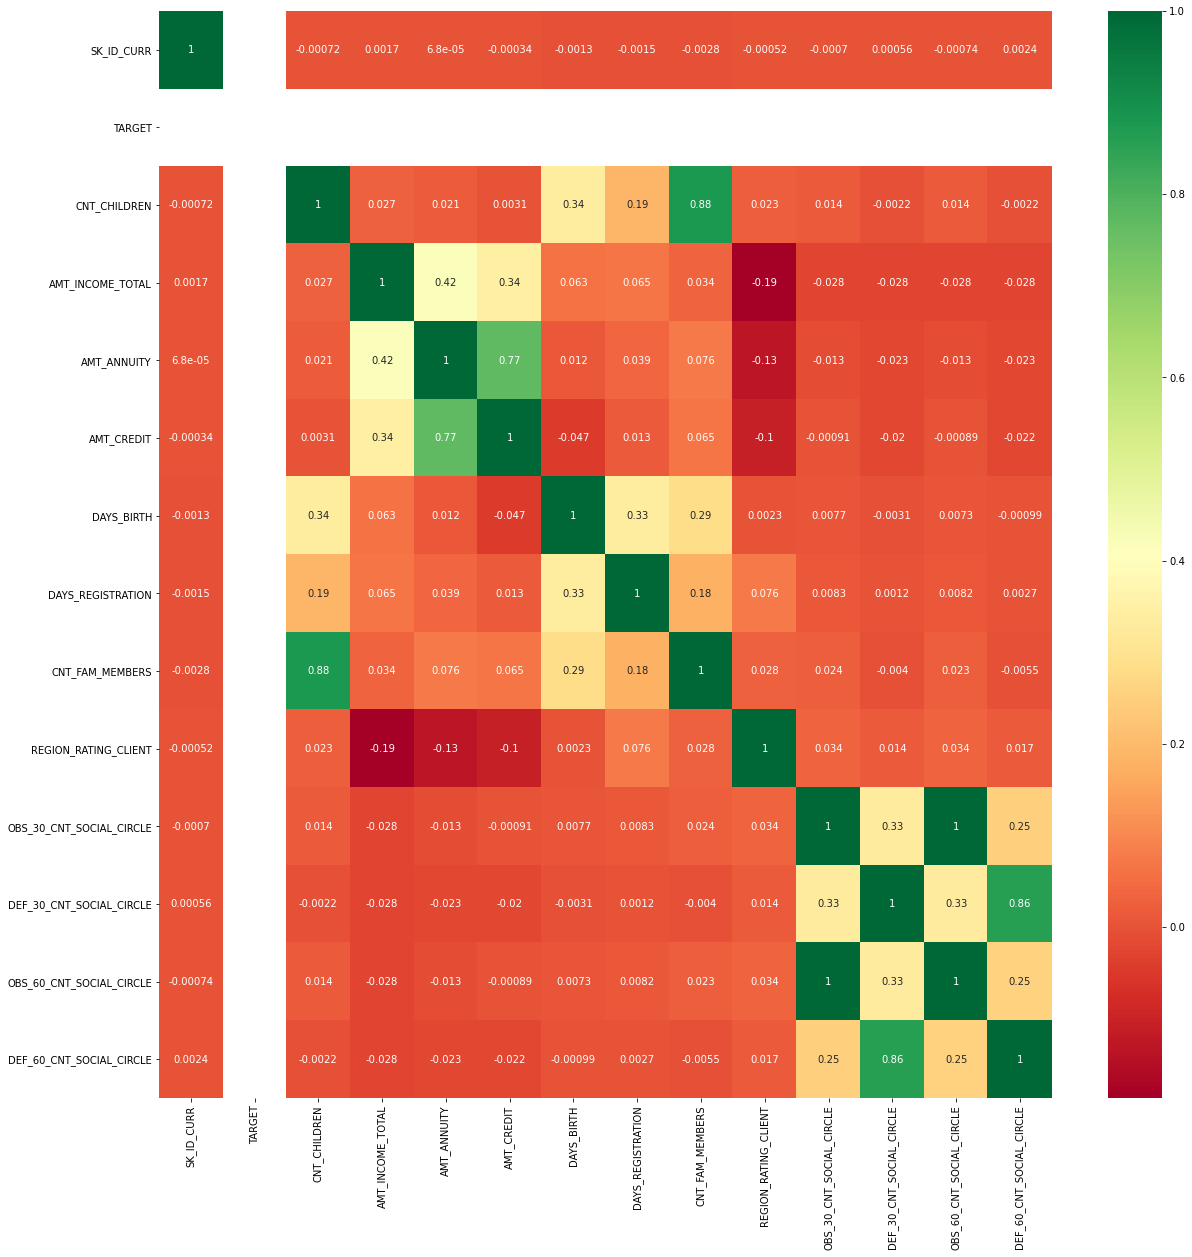

In [114]:
#Creating a correlation heatmap for temp1.
plt.figure(figsize=[20,20])
sns.heatmap(temp1.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [115]:
#Creating a teporary dataframe from T1 with favourable columns
temp2=T1[["SK_ID_CURR", "TARGET", "NAME_CONTRACT_TYPE", "CODE_GENDER","CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_ANNUITY","AMT_CREDIT","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","DAYS_BIRTH","DAYS_REGISTRATION","OCCUPATION_TYPE","CNT_FAM_MEMBERS","REGION_RATING_CLIENT","ORGANIZATION_TYPE","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]]

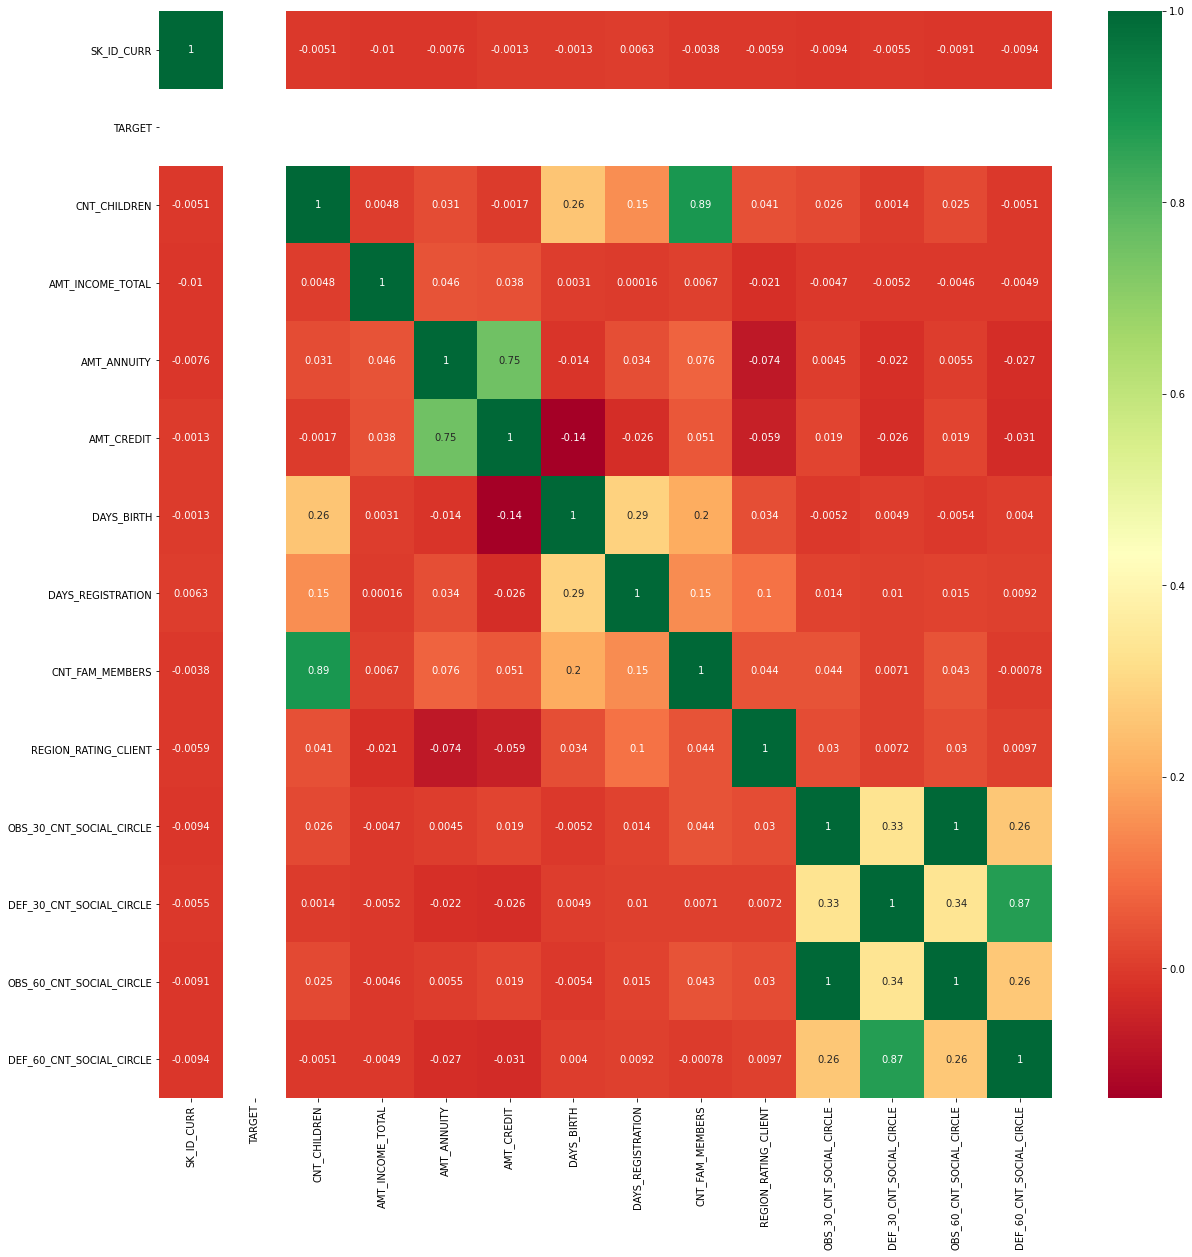

In [116]:
#Creating a correlation heatmap for temp2 dataframe
plt.figure(figsize=[20,20])
sns.heatmap(temp2.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [117]:
#Creating a teporary dataframe from application with favourable columns
temp=application[["SK_ID_CURR", "TARGET", "NAME_CONTRACT_TYPE", "CODE_GENDER","CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_ANNUITY","AMT_CREDIT","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","DAYS_BIRTH","DAYS_REGISTRATION","OCCUPATION_TYPE","CNT_FAM_MEMBERS","REGION_RATING_CLIENT","ORGANIZATION_TYPE","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]]

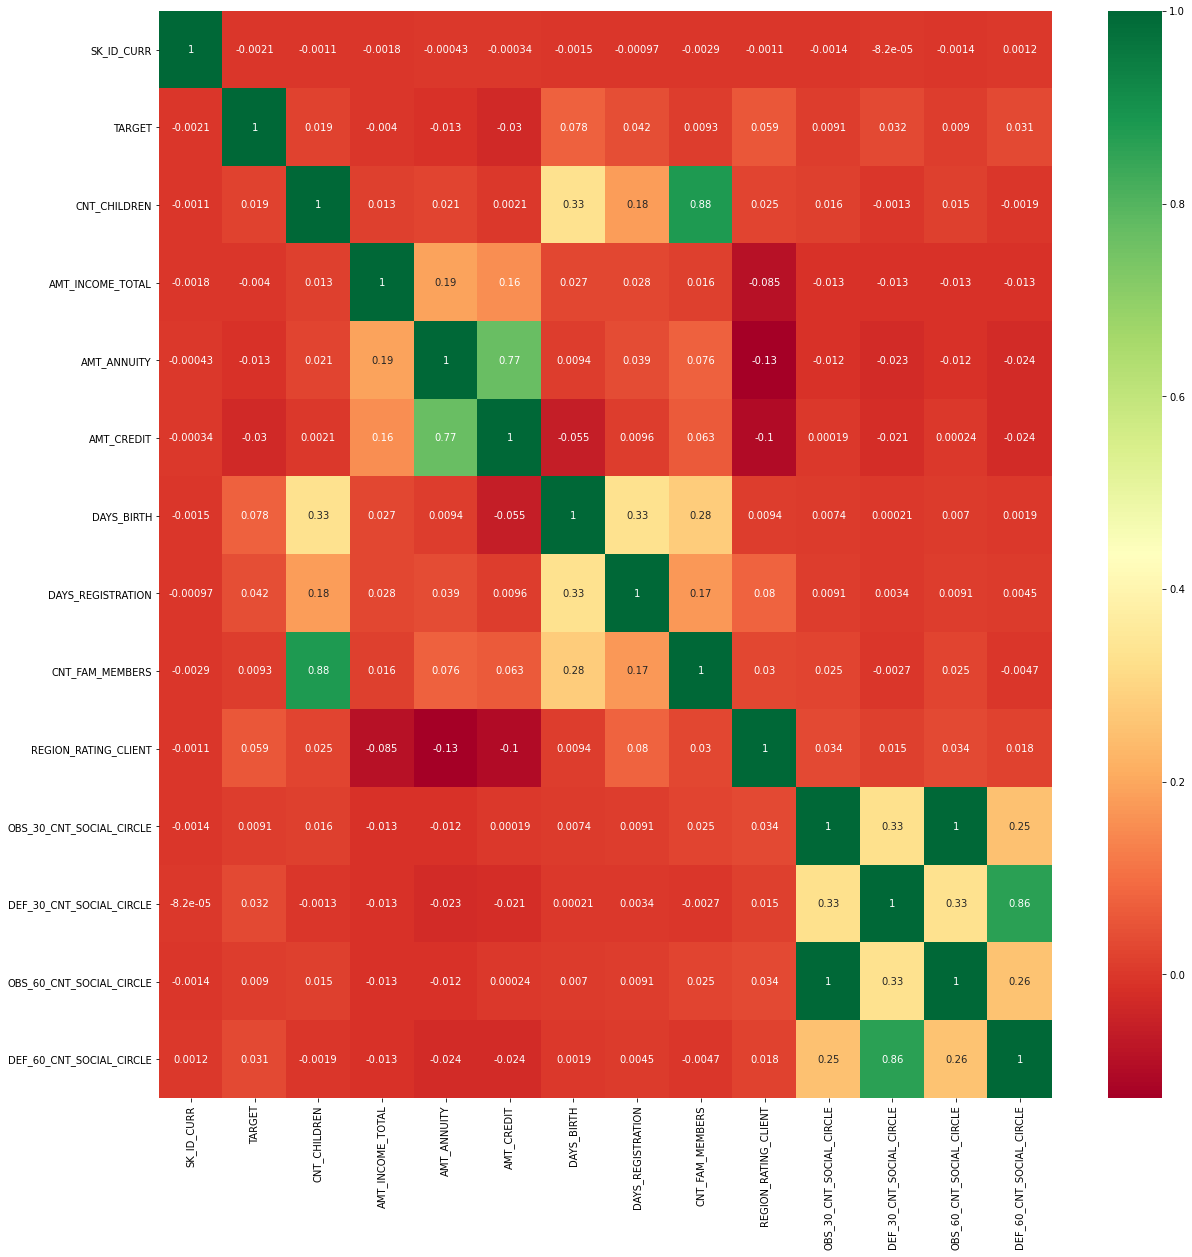

In [118]:
#Creating a correlation matrix for temp dataframe.
plt.figure(figsize=[20,20])
sns.heatmap(temp.corr(),annot=True,cmap="RdYlGn")
plt.show()

Few most important variables/ highly correlated variables to target variables are:
1. DAYS_BIRTH
2. REGION_ATING_CLIENT
3. DAYS_REGISTRATION
4. DEF_30_CNT_SOCIAL_CIRCLE
5. DEF_60_CNT_SOCIAL_CIRCLE

<a id="Read2"></a>
## Task 4: Reading the Data(Previous Application)

>### Subtask 4.1: Read the Previous Application Data.

In [4]:
#Reading the data.
previous = pd.read_csv("previous_application.csv")

In [121]:
#Taking a peak at the data

previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


- ###  Subtask 4.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [122]:
# Getting the dimensions of the data
previous.shape

(1670214, 37)

In [123]:
#Using info() to get column data types and null values in it.
previous.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [124]:
#Using describe() to get overall analysis of the dataframe.
previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


<a id="Analysis2"></a>
## Task- 5: Analysis Of Previous Application 

<a id="Uni2"></a>
>- ###  Subtask 5.1: Univariate Analysis

In [125]:
## WHAT TYPE OF LOAN CLIENTS MOSTLY LOOK FOR:

previous['NAME_CONTRACT_TYPE'] = previous['NAME_CONTRACT_TYPE'].apply(lambda x:None if x == "XNA" else x)

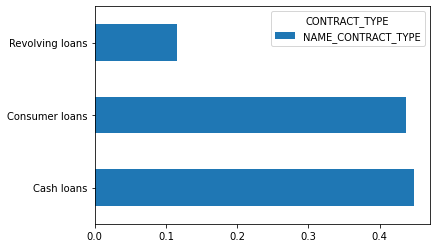

In [126]:
#Drawing horizontal bar graph on NAME_CONTRACT_TYPE
previous['NAME_CONTRACT_TYPE'].dropna().value_counts(normalize=True).plot.barh()
plt.legend(title= "CONTRACT_TYPE" , loc="left")
plt.show()

`Inferences`:NAME_CONTRACT_TYPE Shows The Data For The Previous Application For CASH Loans , Consumer Loan & Revolving Loan we can inferred  from the bar graph That Applicant are more Intrested in Cash Loan and Consumer loan.


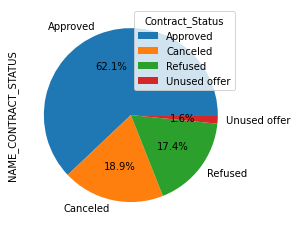

In [127]:
## WHAT WERE THE LOAN STATUS IN PRVIOUS APPLICATION OF CLIENTS:

Contract_Status = previous.NAME_CONTRACT_STATUS.value_counts(normalize = True).plot.pie(autopct='%1.1f%%')
plt.legend(title= "Contract_Status" , loc="left")
plt.show()

`Inference`:NAME_CONTRACT_STATUS Shows The Data for Contract status (approved, cancelled, Refused , Unused) of previous application from the given information 62.1% of loan application was Approved.

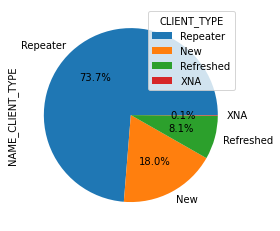

In [128]:
## WHAT TYPE OF CLIENT APPLY FOR THE LOAN FROM PREVIOUS APPLICATIONS: 
previous.NAME_CLIENT_TYPE.value_counts()
Clint_Type = previous.NAME_CLIENT_TYPE.value_counts(normalize = True).plot.pie(autopct='%1.1f%%')
plt.legend(title= "CLIENT_TYPE" , loc="left corner ",)
plt.show()

`Inference`:FROM CLIENT_TYPE Chart we can understand that 73.7% i.e For the Loan Application The Repeater Clients applied the most And the people with No Previous Such Loan Condition are Least.

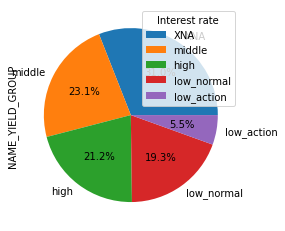

In [129]:
## HOW WAS THE INTREST RATE IN PREVIOUS APPLICATIONS:
previous.NAME_YIELD_GROUP.value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(title= "Interest rate" , loc="left")
plt.show()

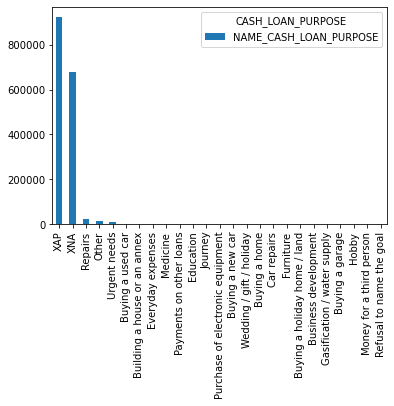

In [130]:
## Purpose of the cash loan:

previous.NAME_CASH_LOAN_PURPOSE.value_counts().plot.bar()
plt.legend(title= "CASH_LOAN_PURPOSE" , loc="left corner ")
plt.show()

`Inferences`:CASH_LOAN_PURPOSE inffered detail view about the clients loan Requirement and amount of are maint been invested inform of asset


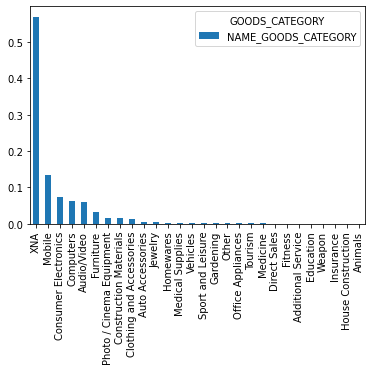

In [131]:
## On Which GOODS CATEGORY LOAN MAINLY APPLIED FOR :

previous['NAME_GOODS_CATEGORY'].value_counts(normalize=True).plot.bar()
plt.legend(title= "GOODS_CATEGORY" , loc="left corner ")
plt.show()

`Inferences`:From the "Previous Application" we can infer that majority of application where for `Mobile` and customer are highly intrested in Consumer Electronics  and so on.

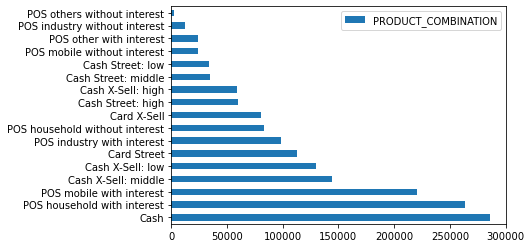

In [132]:
## Detailed product combination of the previous application

previous.PRODUCT_COMBINATION.value_counts().plot.barh()
plt.legend(loc="left corner ")
plt.show()

`Inference`:
1. FROM THE DETAILED PRODUCT COMBINATION OF THE PREVIOUS APPLICATION WE CAN INFERANCE THAT CLIENTS ARE HIGHLY INTRESTED IN CASH LOAN.
2. LOANS WITH INTEREST ARE MUCH SAFE AND LOWER THE RISK FOR APPLICANT
3. CLIENTS TOOK LOAN OTHER THAN CASH ARE INTRESTED IN HOUSEHOLD LAONS

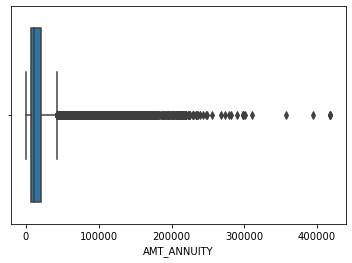

In [133]:
# Applying box plot to see the variation in the data

sns.boxplot(previous['AMT_ANNUITY'])
plt.show()

<a id="Bi2"></a>
>- ###  Subtask 5.2: Bivariate Analysis

In [134]:
previous.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669868 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

Text(0.5, 1.0, 'Annuity vs Credit of people who repayed the loan')

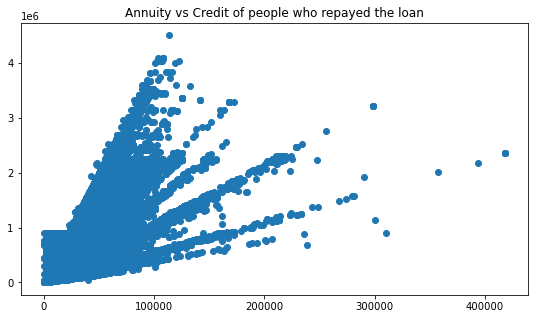

In [135]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.scatter(previous['AMT_ANNUITY'] ,previous['AMT_CREDIT'])
plt.title("Annuity vs Credit of people who repayed the loan")

`Inference`:We can see that Annuity is proportional to Credit. Higher the credit on the person, higher is the annuity. This was seen for both people who defaulted and people who didn't.

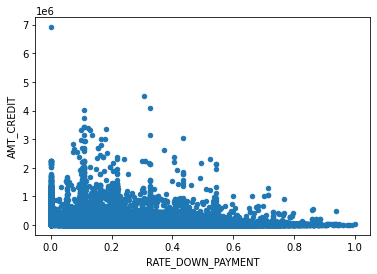

In [136]:
previous.plot.scatter(x ="RATE_DOWN_PAYMENT", y = "AMT_CREDIT")
plt.show()

`Inference`: We can see that `Rate down Payment` is mostly with in the limit of `Amount Credited Loan` were as in some cases it is beyond the range.

In [137]:
previous.groupby("NAME_CONTRACT_TYPE")["AMT_CREDIT"].mean()

NAME_CONTRACT_TYPE
Cash loans         304061.487936
Consumer loans      91524.593300
Revolving loans    173505.596310
Name: AMT_CREDIT, dtype: float64

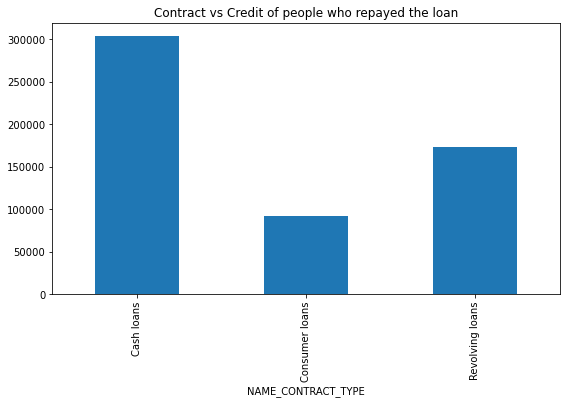

In [138]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
previous.groupby("NAME_CONTRACT_TYPE")["AMT_CREDIT"].mean().plot.bar()
plt.title("Contract vs Credit of people who repayed the loan")
plt.show()

`Inference`:From the digram it conclude that `Cash Loan` is majorily applied for cash only are mainly get Recorved as compared to cunsomer loans and revolving loans.

In [139]:
previous.groupby("NAME_PAYMENT_TYPE")["AMT_CREDIT"].aggregate(["mean","median"])

,mean,median
NAME_PAYMENT_TYPE,,
Cash through the bank,246113.347327,110745.0
Cashless from the account of the employer,209024.082083,84528.0
Non-cash from your account,160144.938614,75604.5
XNA,114192.425923,0.0


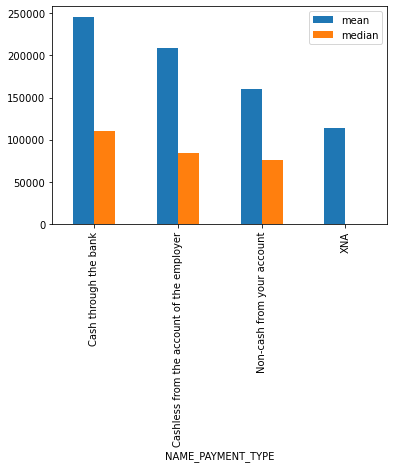

In [140]:
previous.groupby("NAME_PAYMENT_TYPE")["AMT_CREDIT"].aggregate(["mean","median"]).plot.bar()
plt.show()

In [141]:
previous.groupby("NAME_YIELD_GROUP")["AMT_CREDIT"].aggregate(["mean","median"])

,mean,median
NAME_YIELD_GROUP,,
XNA,70194.095245,0.0
high,112782.360678,59652.0
low_action,416191.636926,145858.5
low_normal,383879.278526,172651.5
middle,232004.150085,129807.0


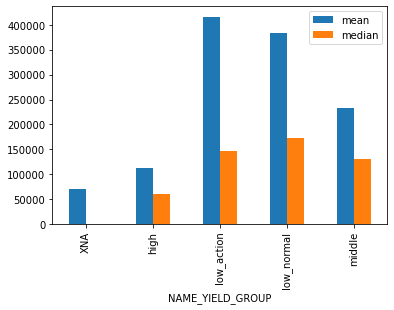

In [142]:
previous.groupby("NAME_YIELD_GROUP")["AMT_CREDIT"].aggregate(["mean","median"]).plot.bar()
plt.show()

In [143]:
previous.groupby("NAME_CASH_LOAN_PURPOSE")["AMT_CREDIT"].aggregate(["mean","median"])

,mean,median
NAME_CASH_LOAN_PURPOSE,,
Building a house or an annex,9.793209e+05,767664.0
Business development,8.481734e+05,709749.0
Buying a garage,8.301438e+05,711081.0
Buying a holiday home / land,1.144549e+06,1021653.0
Buying a home,1.321436e+06,1255680.0
Buying a new car,1.294355e+06,1255680.0
Buying a used car,7.828692e+05,640872.0
Car repairs,2.732311e+05,202500.0
Education,2.613733e+05,173839.5


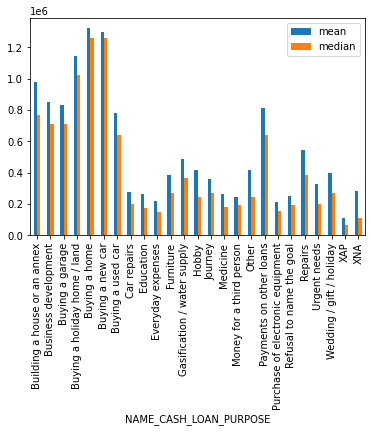

In [144]:
previous.groupby("NAME_CASH_LOAN_PURPOSE")["AMT_CREDIT"].aggregate(["mean","median"]).plot.bar()
plt.show()

`Inference`:From the amount credit for cash loan are high in `Buying Home` and `Buying Car`

In [145]:
previous.groupby("NAME_CLIENT_TYPE")["AMT_CREDIT"].aggregate(["mean","median"])

,mean,median
NAME_CLIENT_TYPE,,
New,106273.490552,66519.0
Refreshed,192611.361443,92736.0
Repeater,218560.047424,86742.0
XNA,151214.439992,0.0


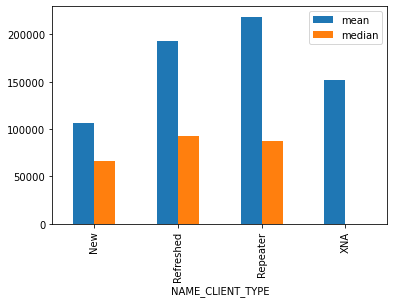

In [146]:
previous.groupby("NAME_CLIENT_TYPE")["AMT_CREDIT"].aggregate(["mean","median"]).plot.bar()
plt.show()

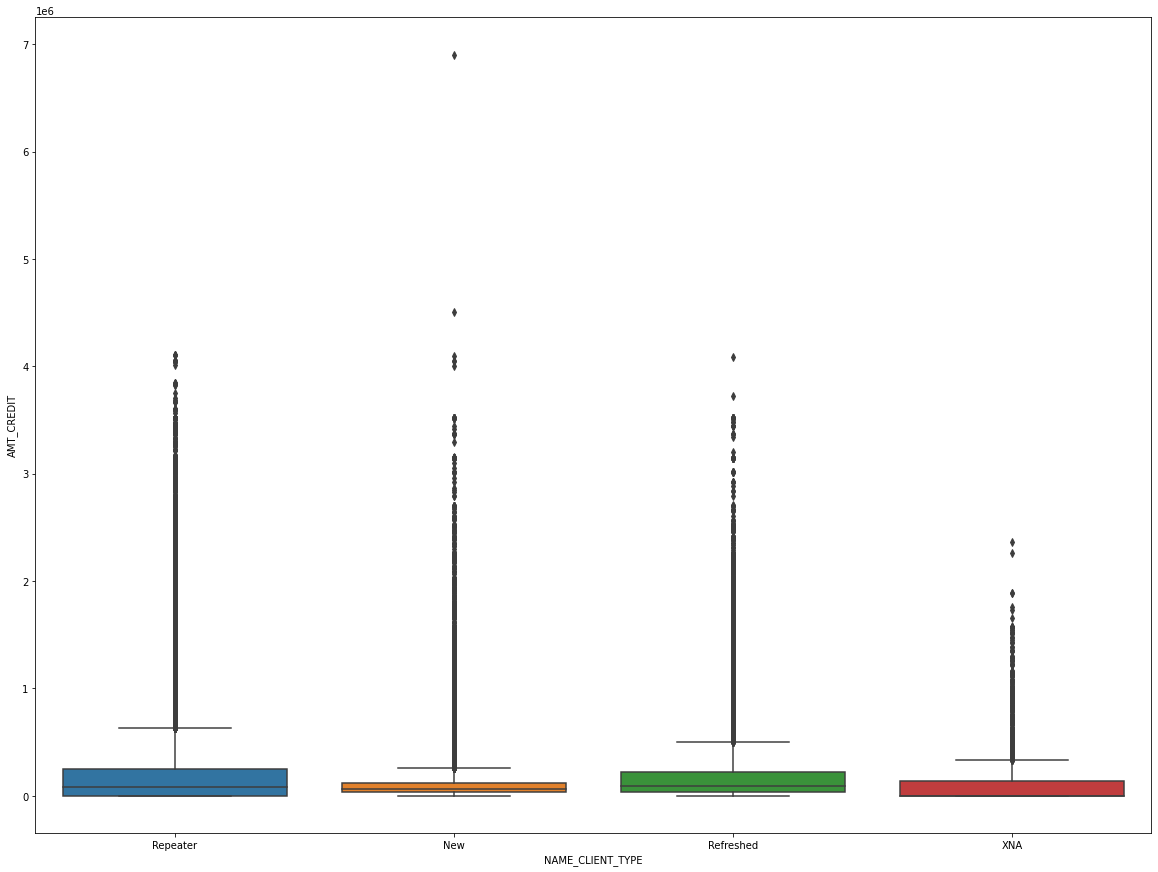

In [147]:
plt.figure(figsize=[20,15])
sns.boxplot(data=previous , x="NAME_CLIENT_TYPE",y="AMT_CREDIT")
plt.show()

`Inference`:we see that the median value for types of client are equal in Repeater category and in Refresh category it conclude that in this two category people ashow more intrest in taking Loan as per Requarement .

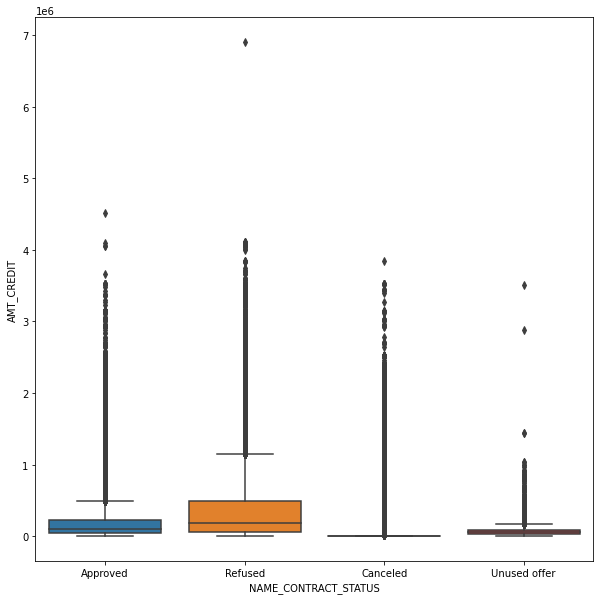

In [148]:
#plot the box plot of .
plt.figure(figsize=[10,10])
sns.boxplot(data=previous , x="NAME_CONTRACT_STATUS",y="AMT_CREDIT")
plt.show()


`Inference`:For Refused, the median of AMT_CREDIT is higher than the rest of the income Loan Contract.

In [149]:
previous[["AMT_CREDIT","RATE_DOWN_PAYMENT","AMT_GOODS_PRICE"]].corr()

,AMT_CREDIT,RATE_DOWN_PAYMENT,AMT_GOODS_PRICE
AMT_CREDIT,1.000000,-0.188128,0.993087
RATE_DOWN_PAYMENT,-0.188128,1.000000,-0.072479
AMT_GOODS_PRICE,0.993087,-0.072479,1.000000


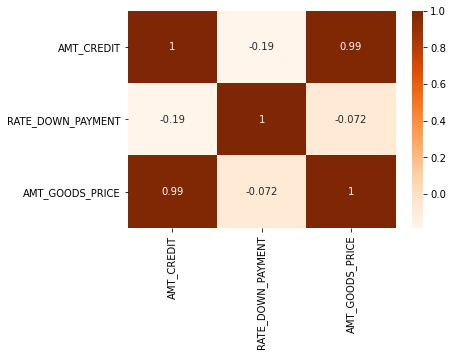

In [150]:

sns.heatmap(previous[["AMT_CREDIT","RATE_DOWN_PAYMENT","AMT_GOODS_PRICE"]].corr(),annot=True,cmap="Oranges") 
plt.show()

In [151]:
previous[["AMT_CREDIT","RATE_DOWN_PAYMENT","RATE_INTEREST_PRIMARY"]].corr()

,AMT_CREDIT,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY
AMT_CREDIT,1.000000,-0.188128,0.125106
RATE_DOWN_PAYMENT,-0.188128,1.000000,-0.103373
RATE_INTEREST_PRIMARY,0.125106,-0.103373,1.000000


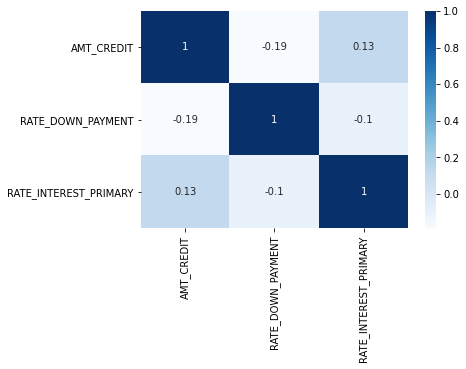

In [5]:
sns.heatmap(previous[["AMT_CREDIT","RATE_DOWN_PAYMENT","RATE_INTEREST_PRIMARY"]].corr(),annot=True,cmap="Blues") 
plt.show()

`Inference`:Values are well balance there is no extra value have been taken with respect to amount of loan in Interest.

In [153]:
temp1=previous[["SK_ID_PREV","SK_ID_CURR","NAME_CONTRACT_TYPE","AMT_ANNUITY","AMT_CREDIT","AMT_DOWN_PAYMENT","AMT_GOODS_PRICE","RATE_INTEREST_PRIMARY","NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS","NAME_PAYMENT_TYPE","NAME_CLIENT_TYPE","NAME_GOODS_CATEGORY","CNT_PAYMENT","DAYS_FIRST_DUE"]]

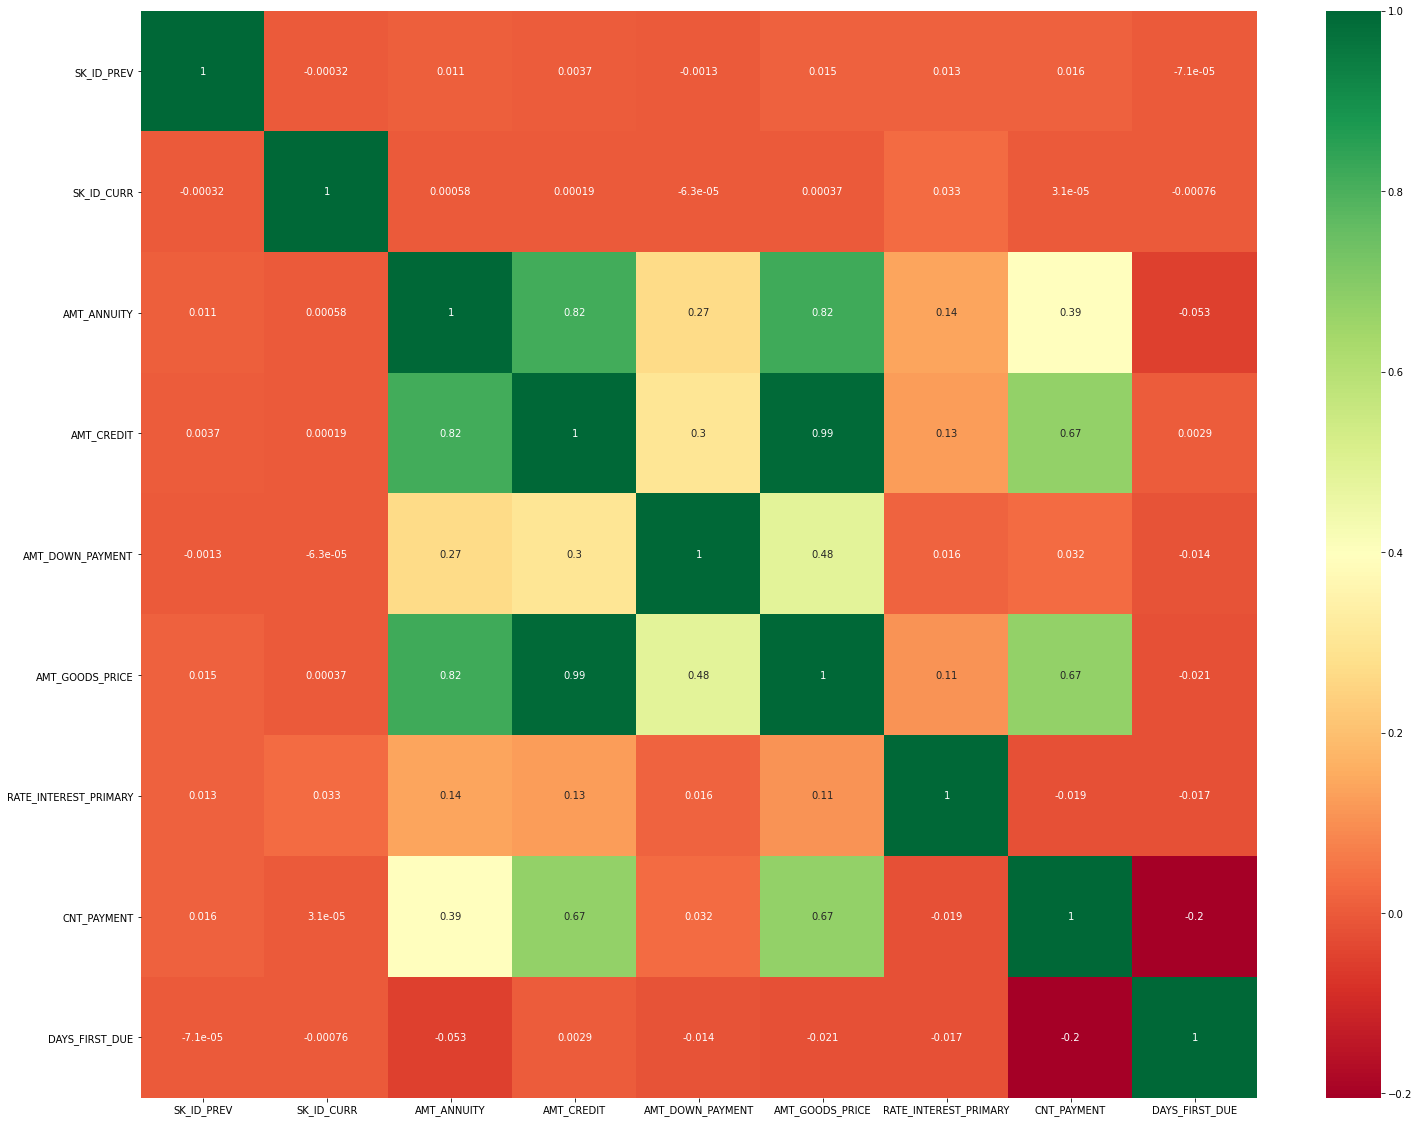

In [154]:
plt.figure(figsize=[25,20])
sns.heatmap(temp1.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
